In [1]:
import matplotlib.pyplot as plt
import numpy as np
import struct
import os 
from scipy.optimize import curve_fit

/home/student/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/student/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/student/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/student/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/student/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-6-09c4999cc8f0>:144: RuntimeWarning: More than 20 figures have b

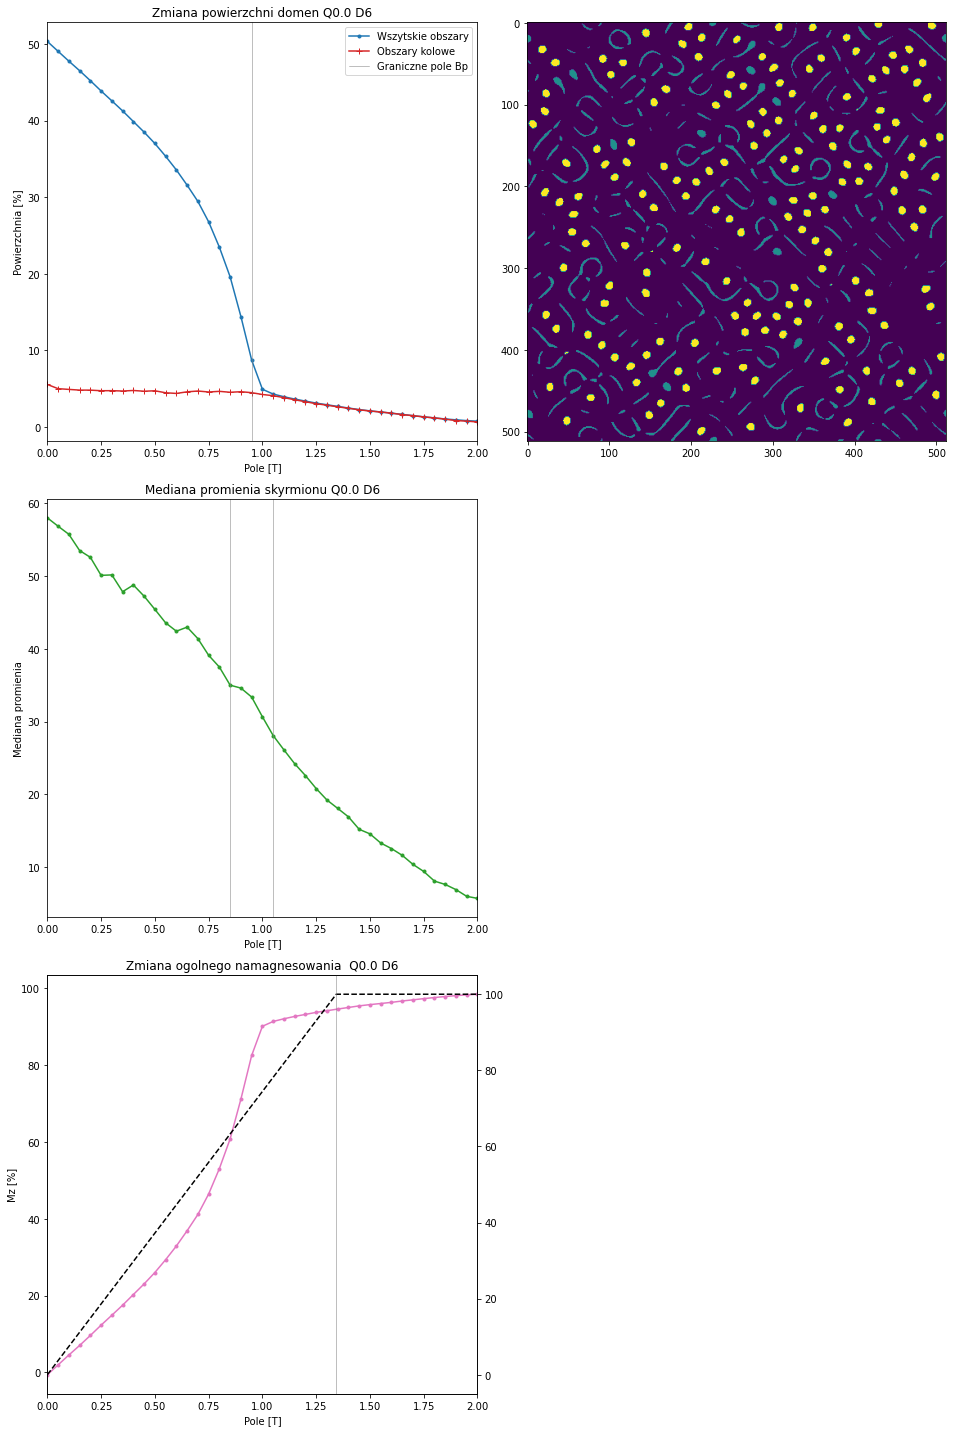

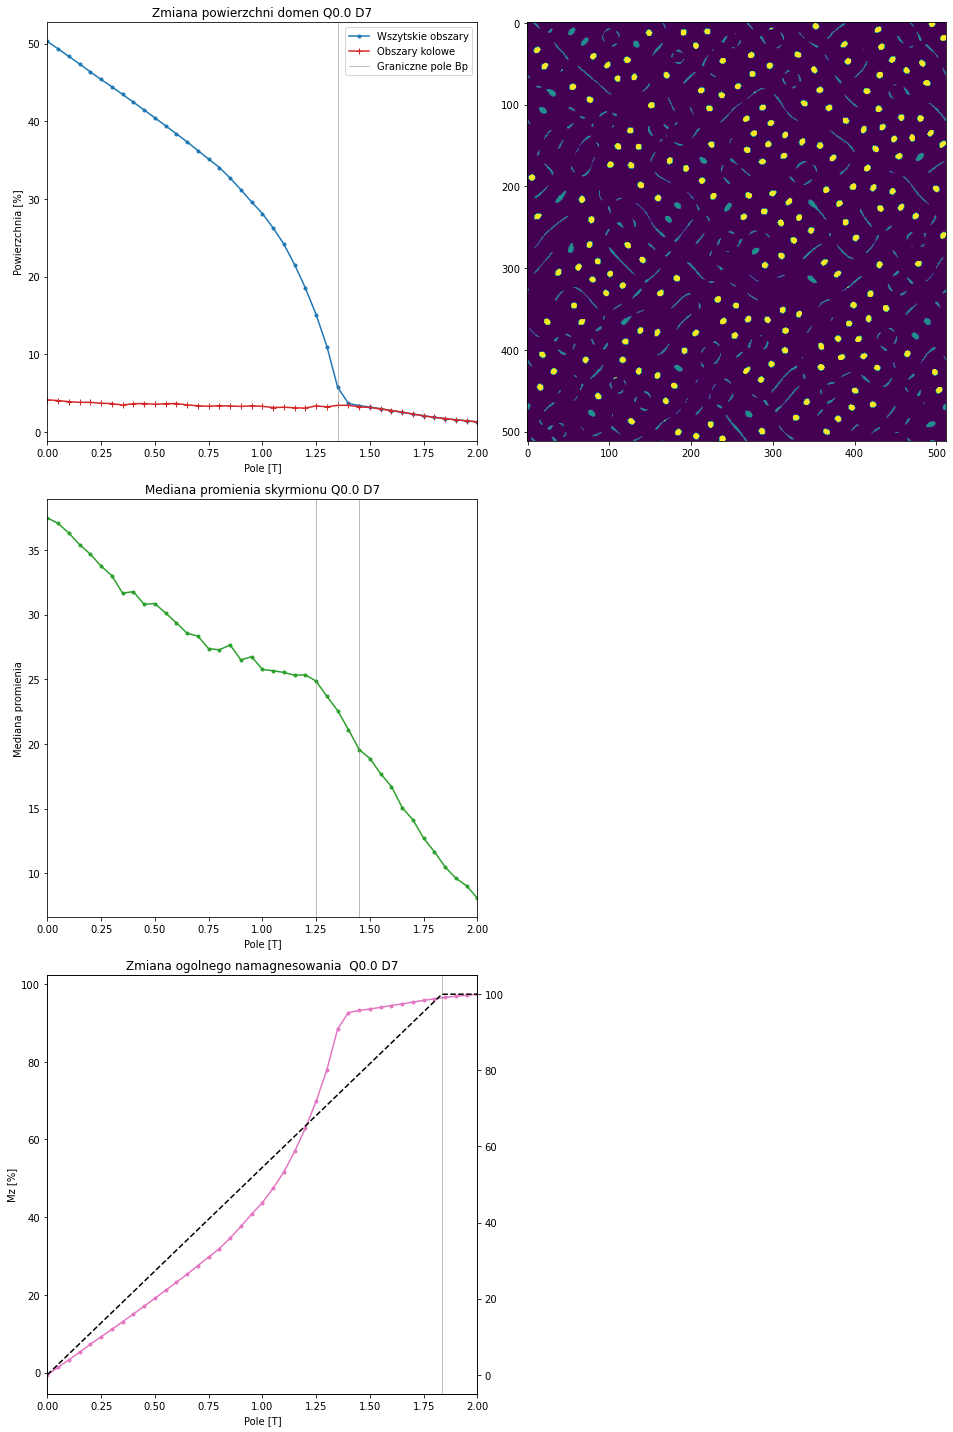

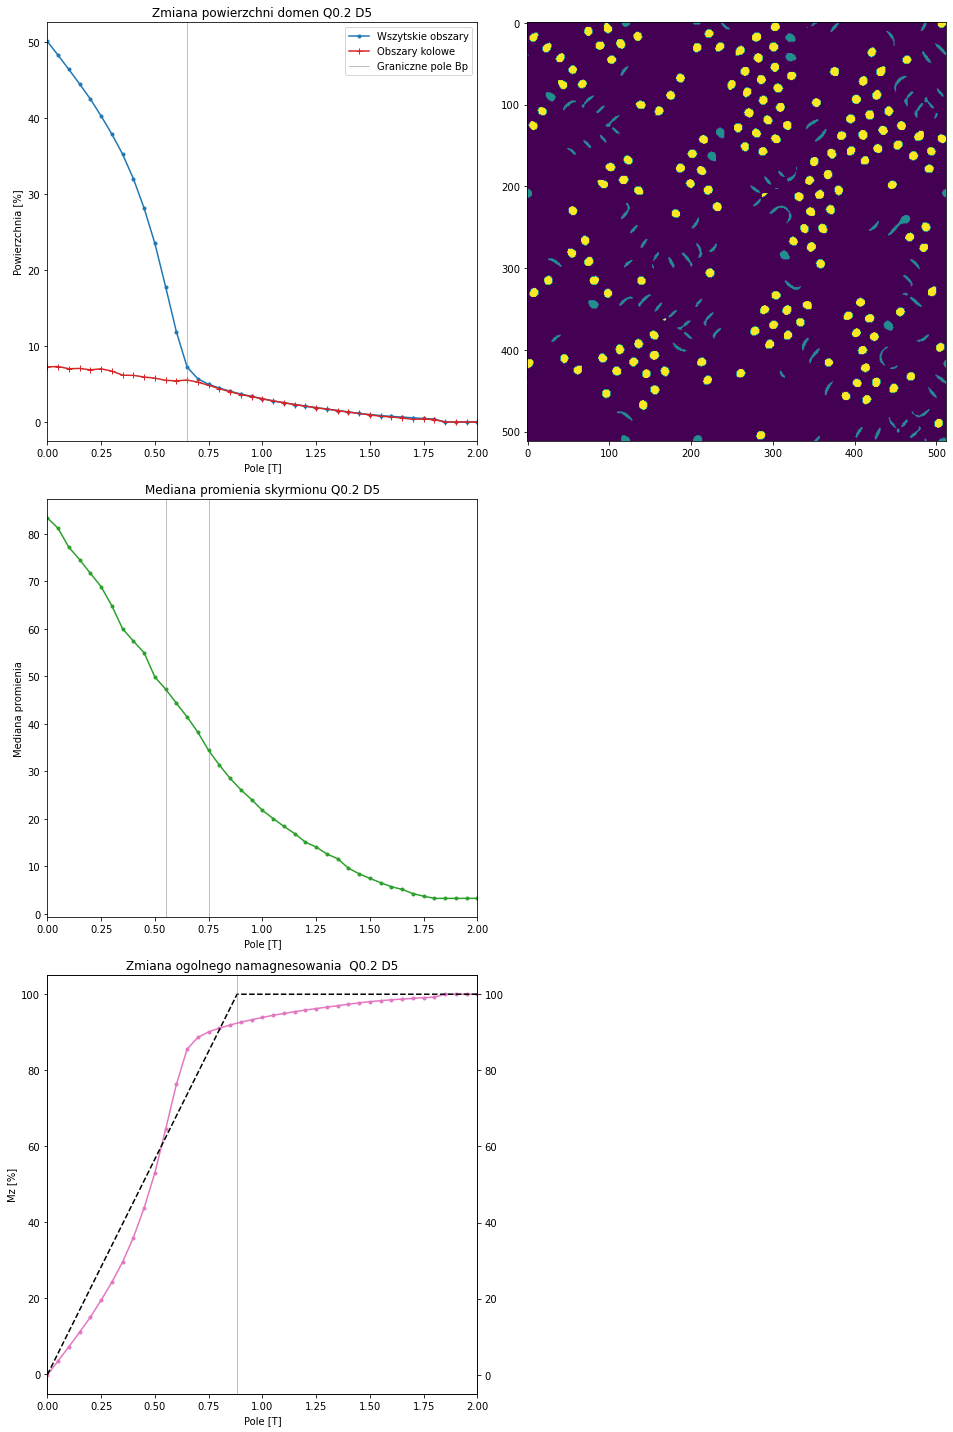

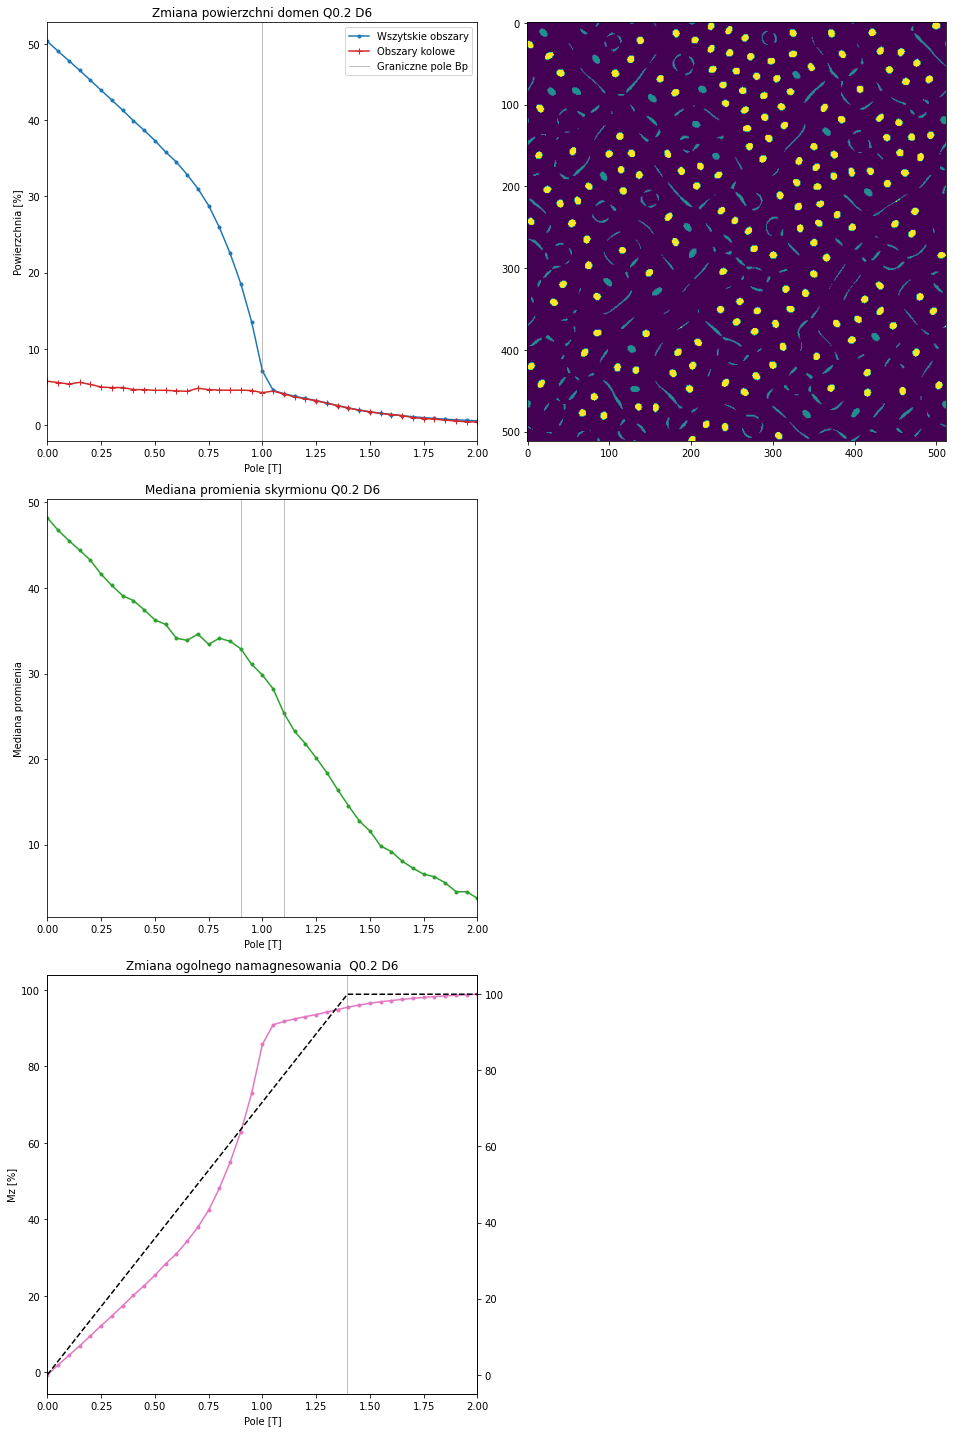

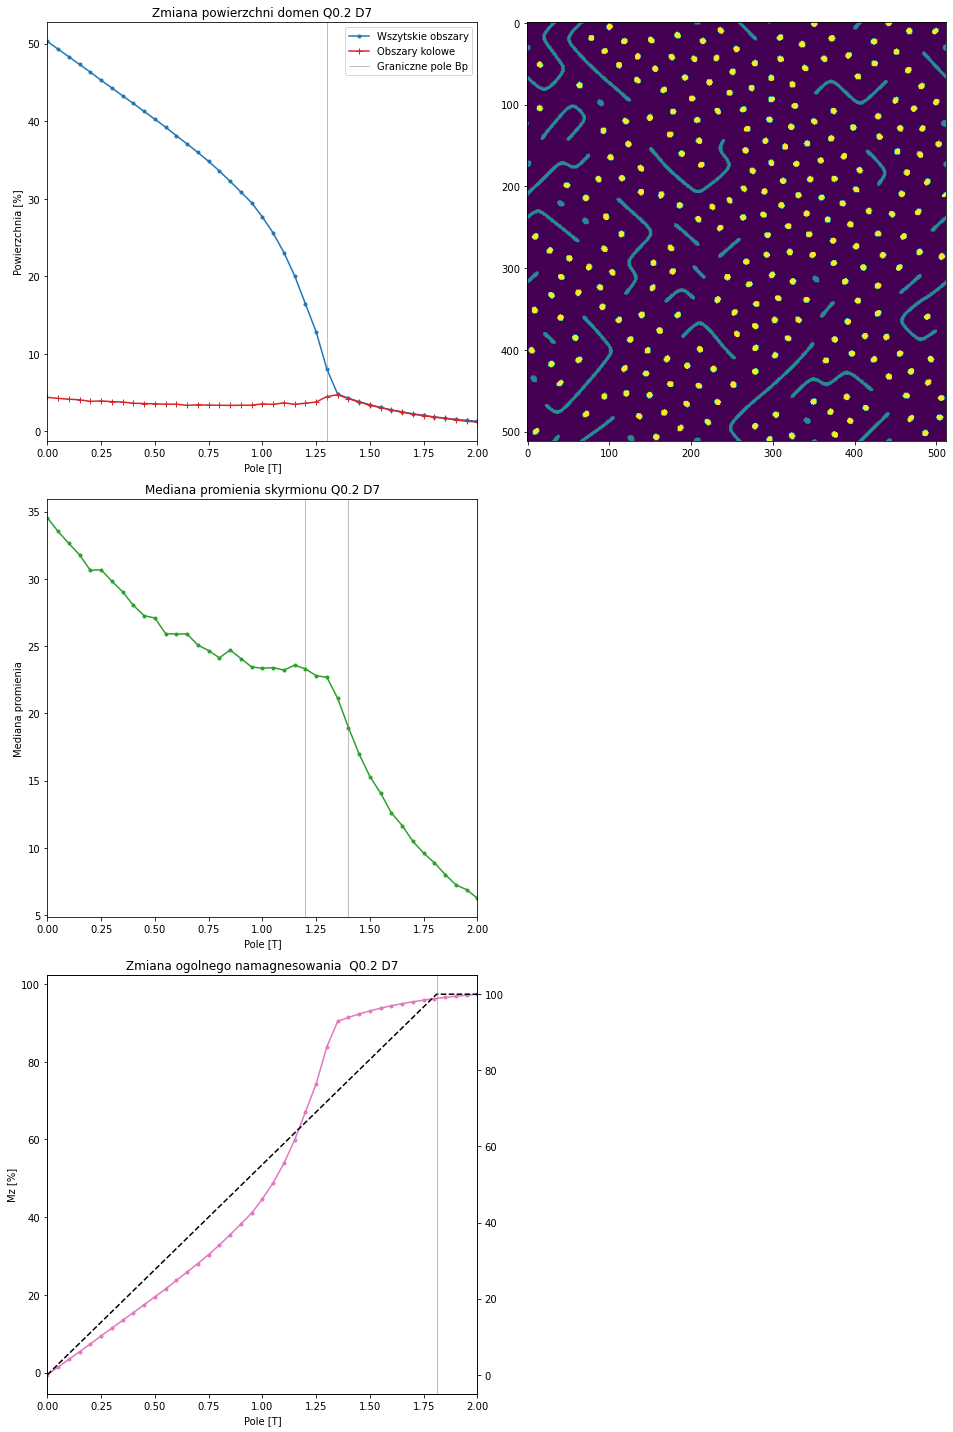

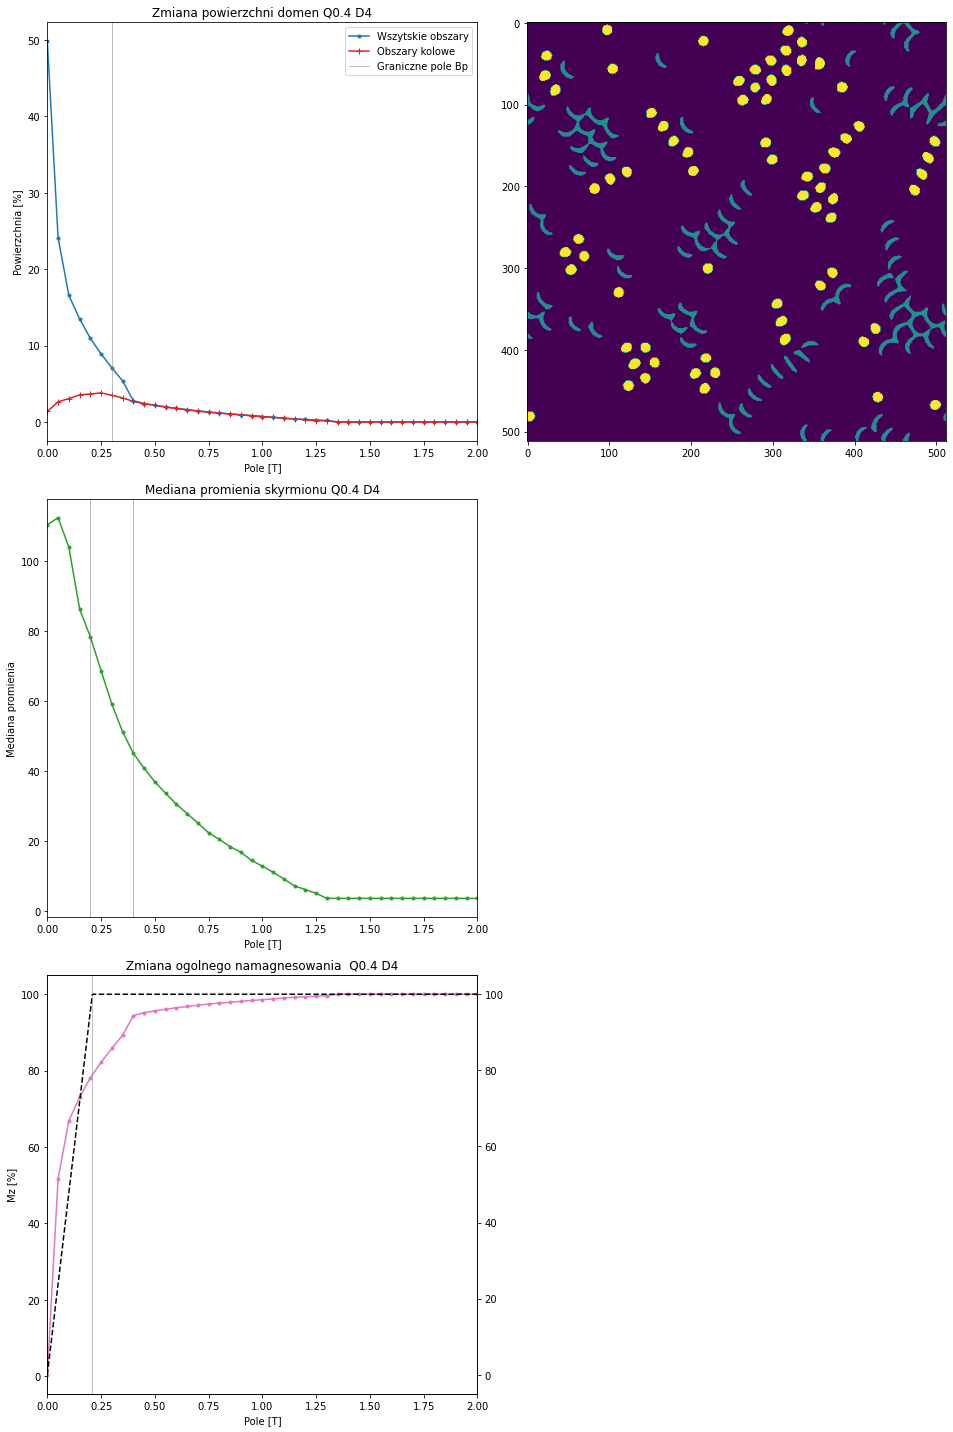

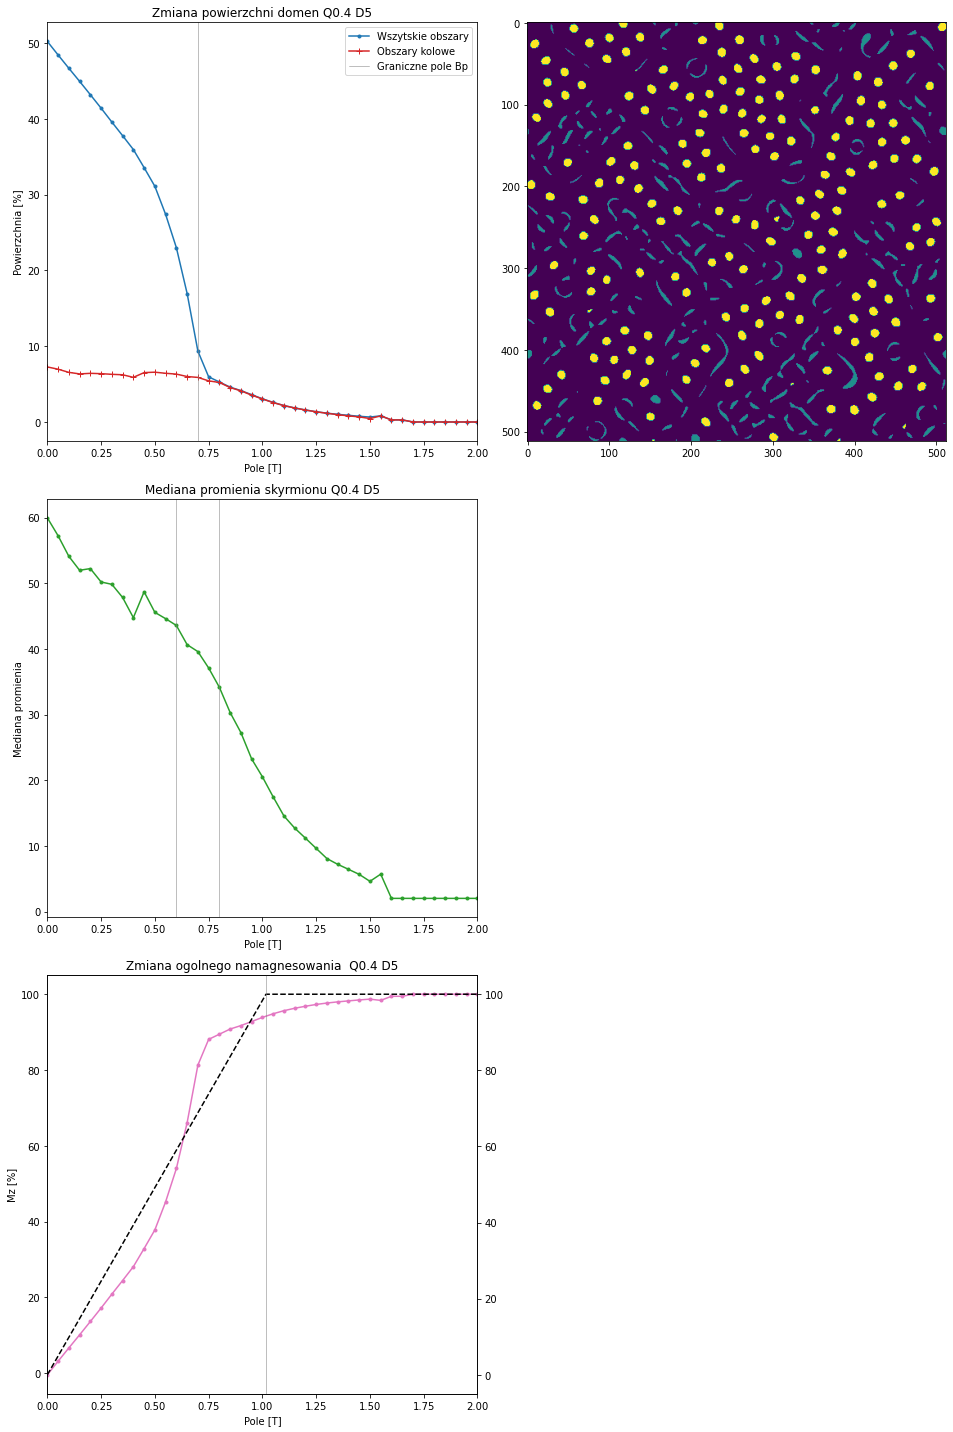

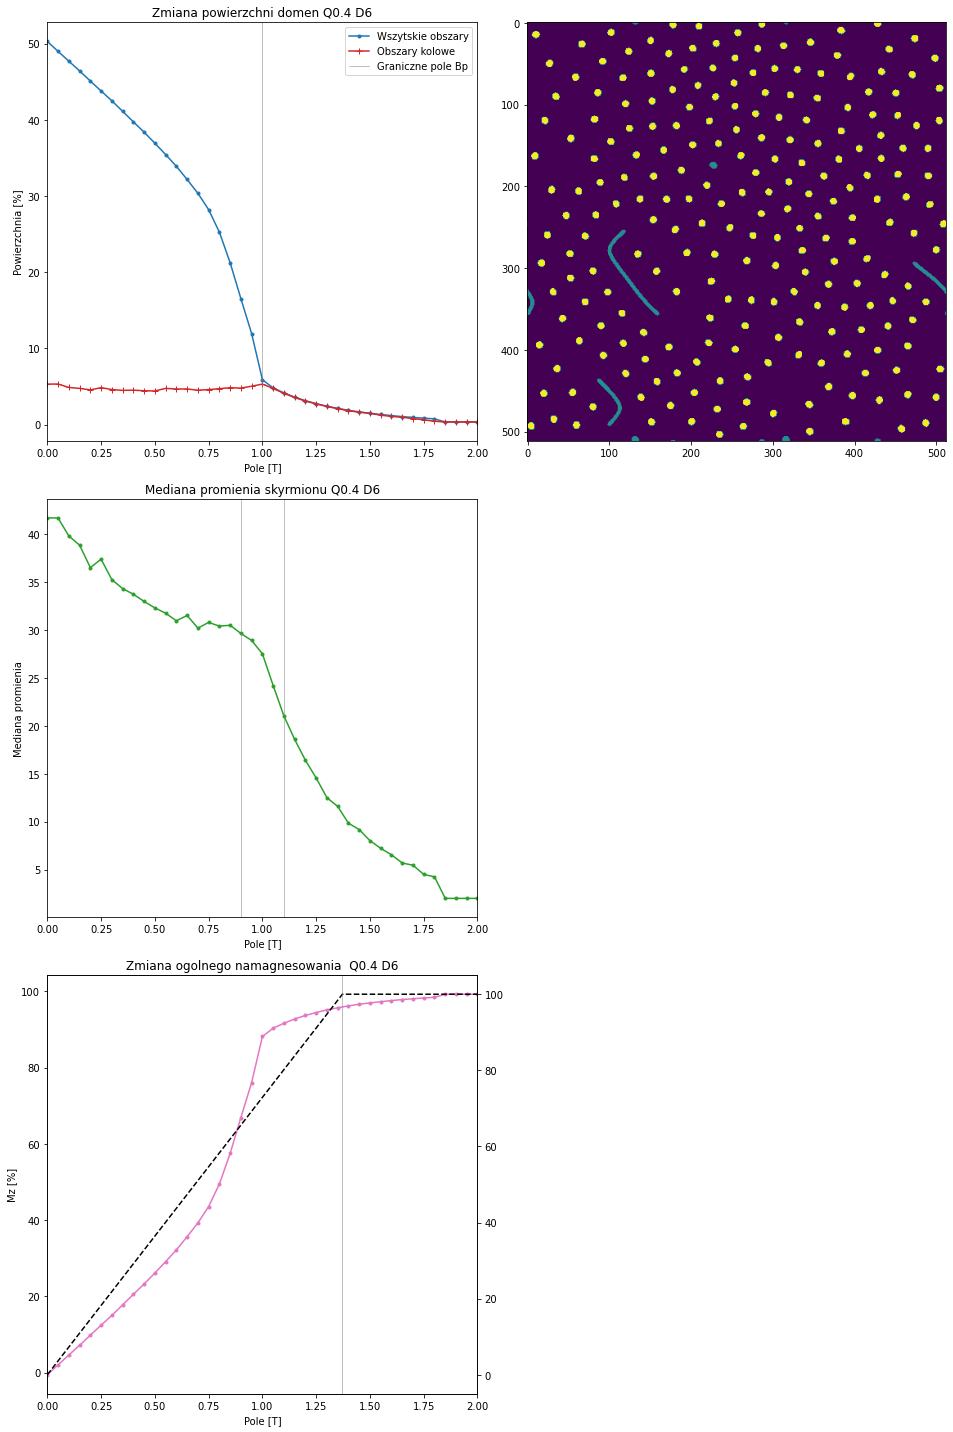

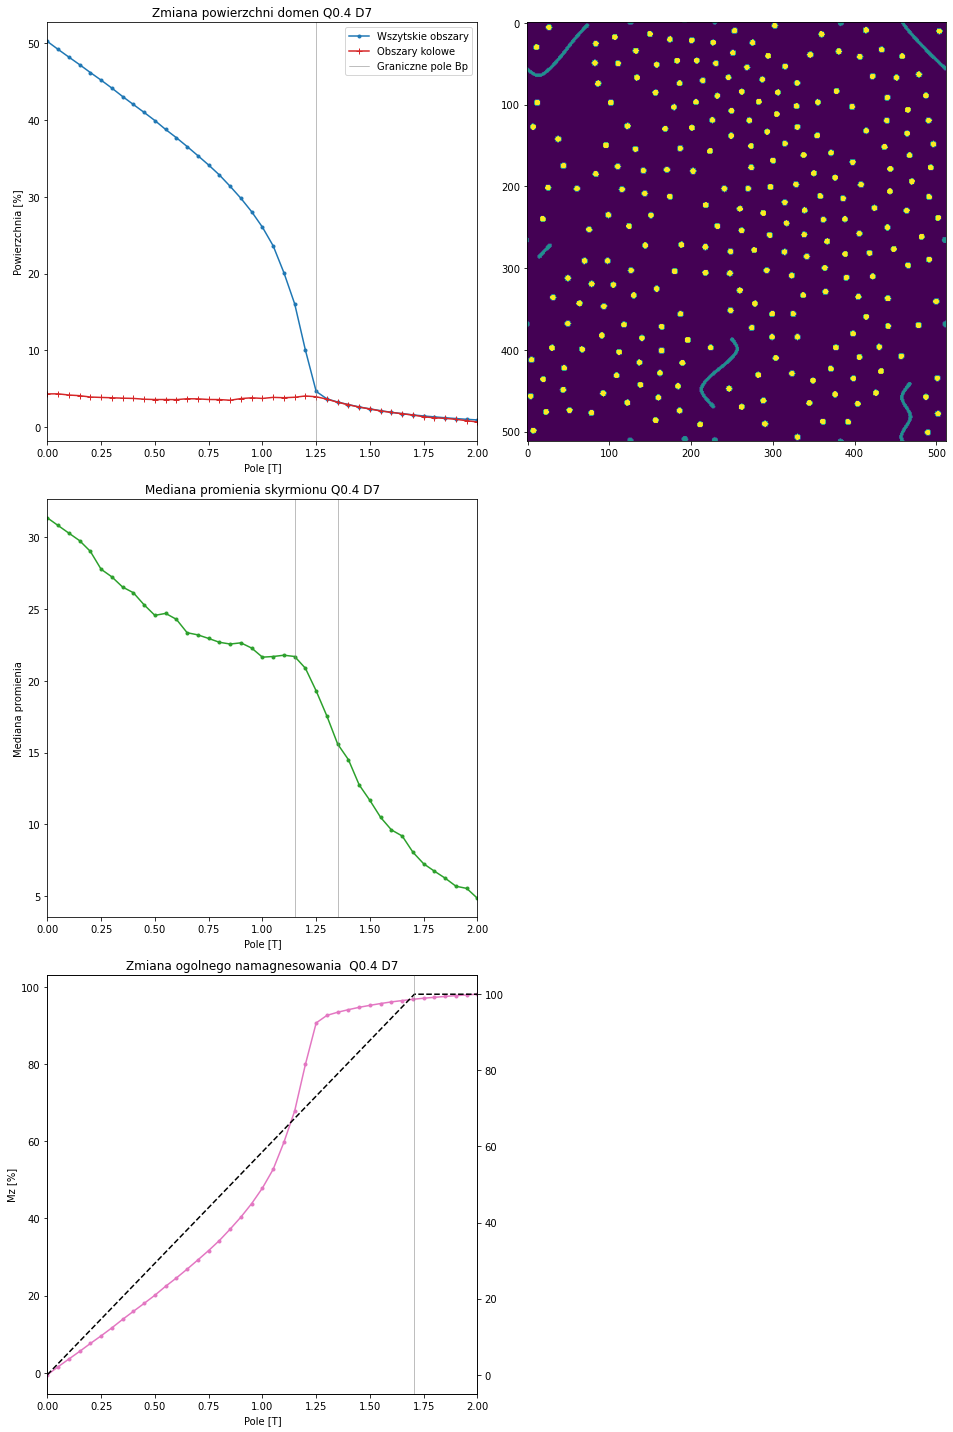

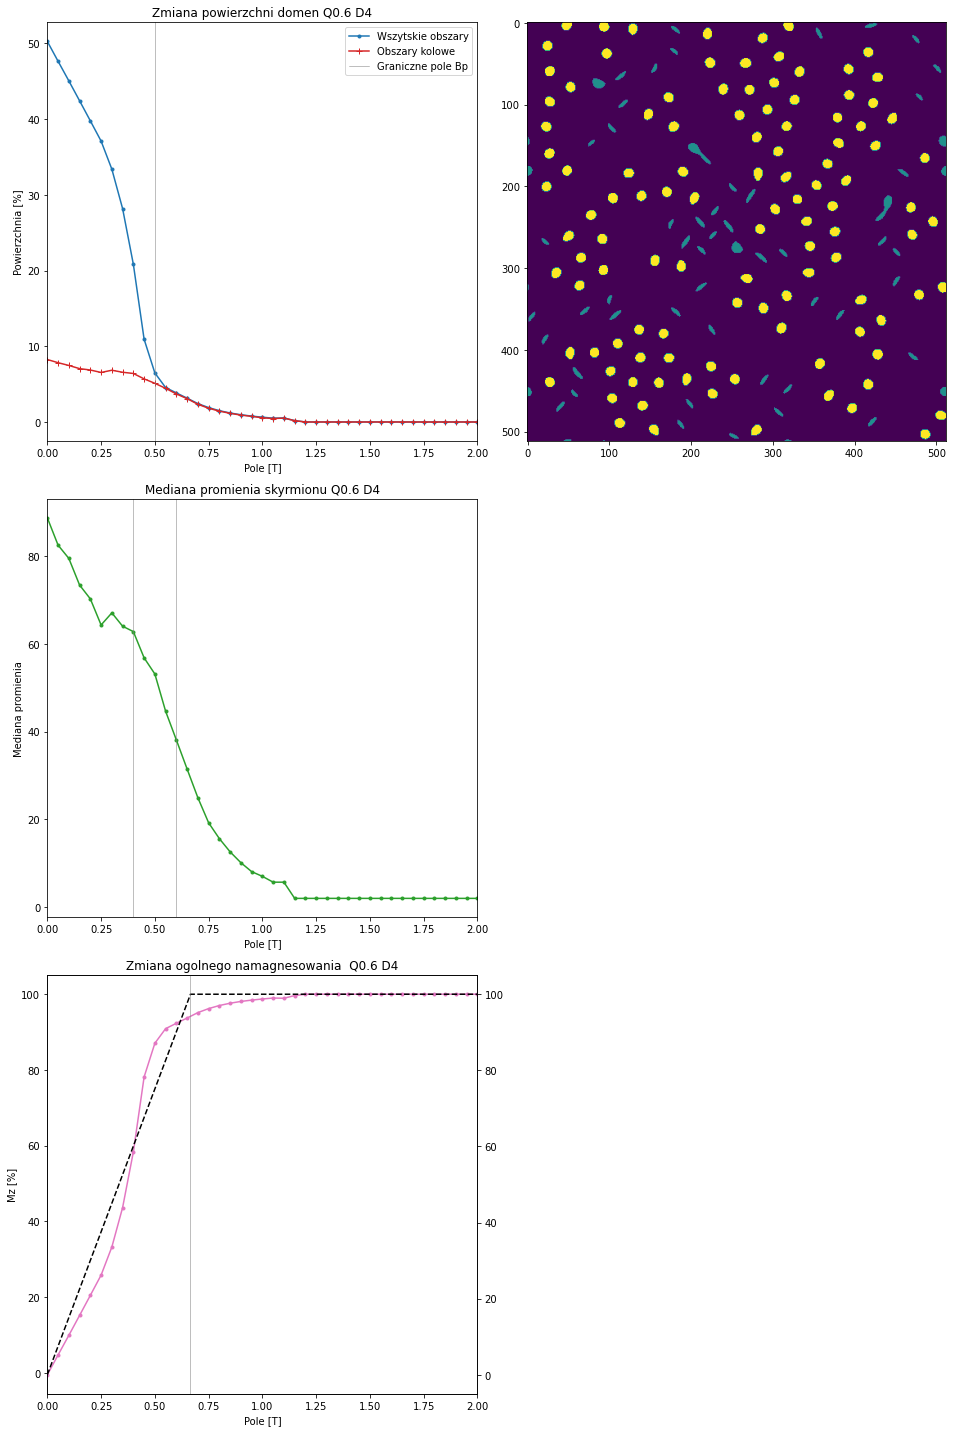

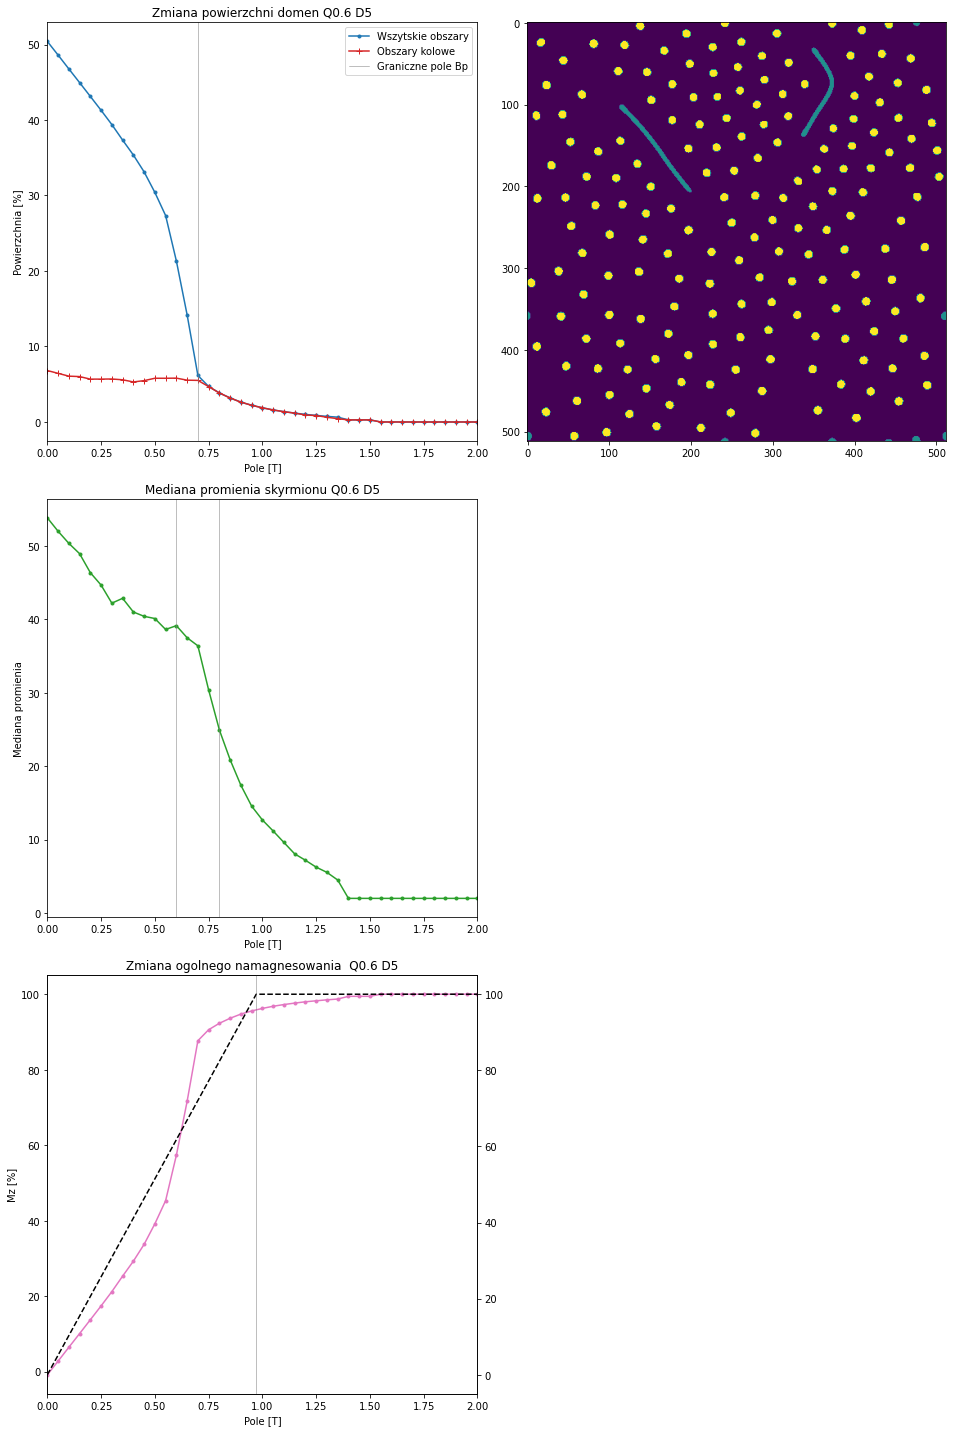

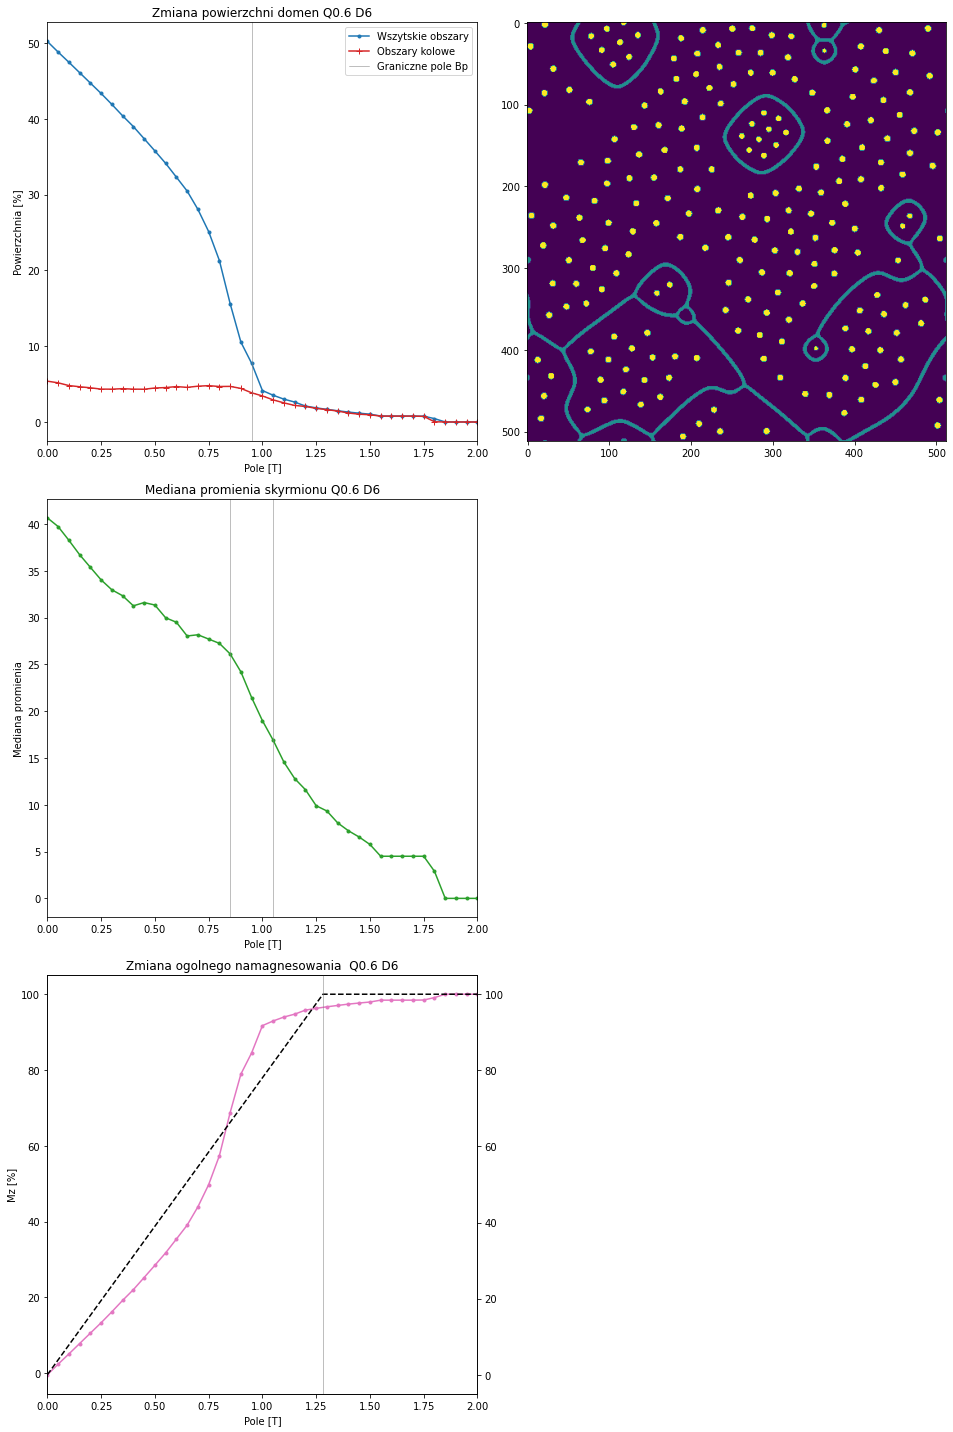

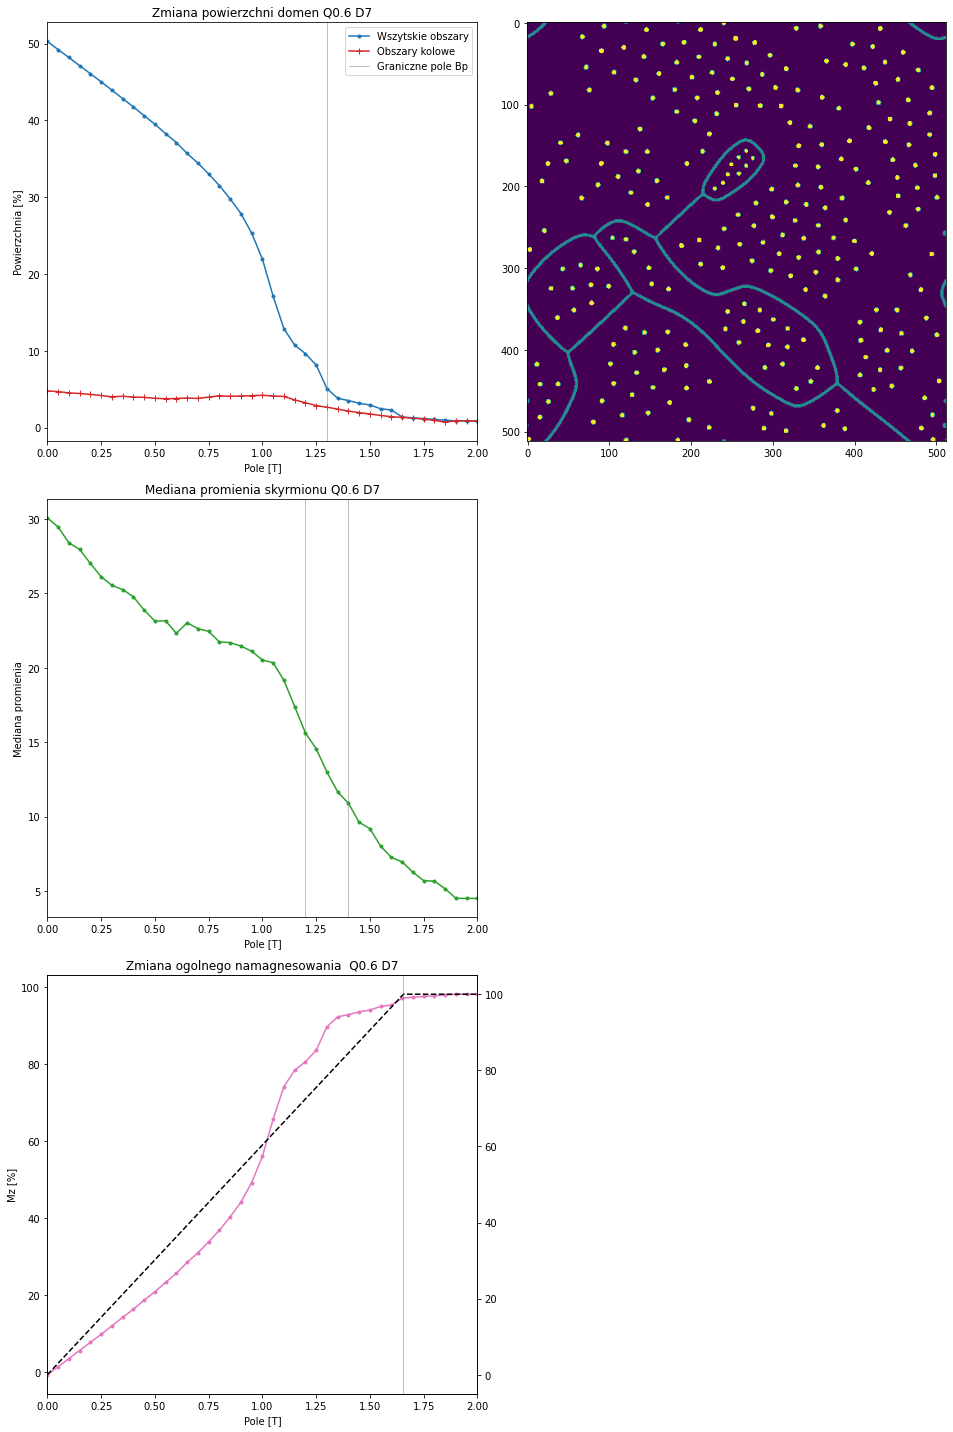

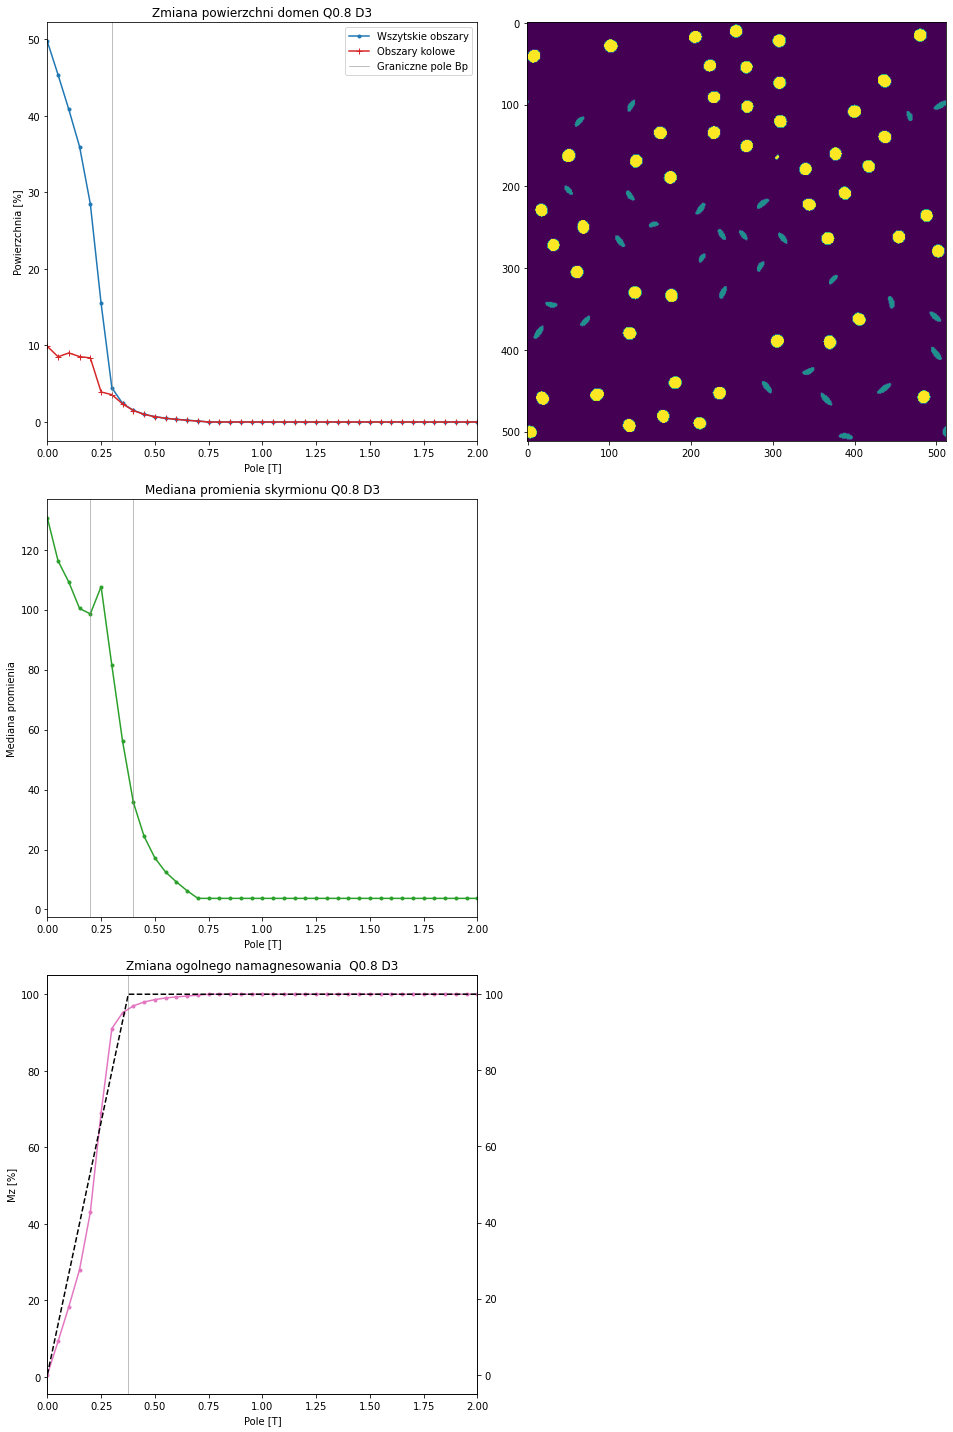

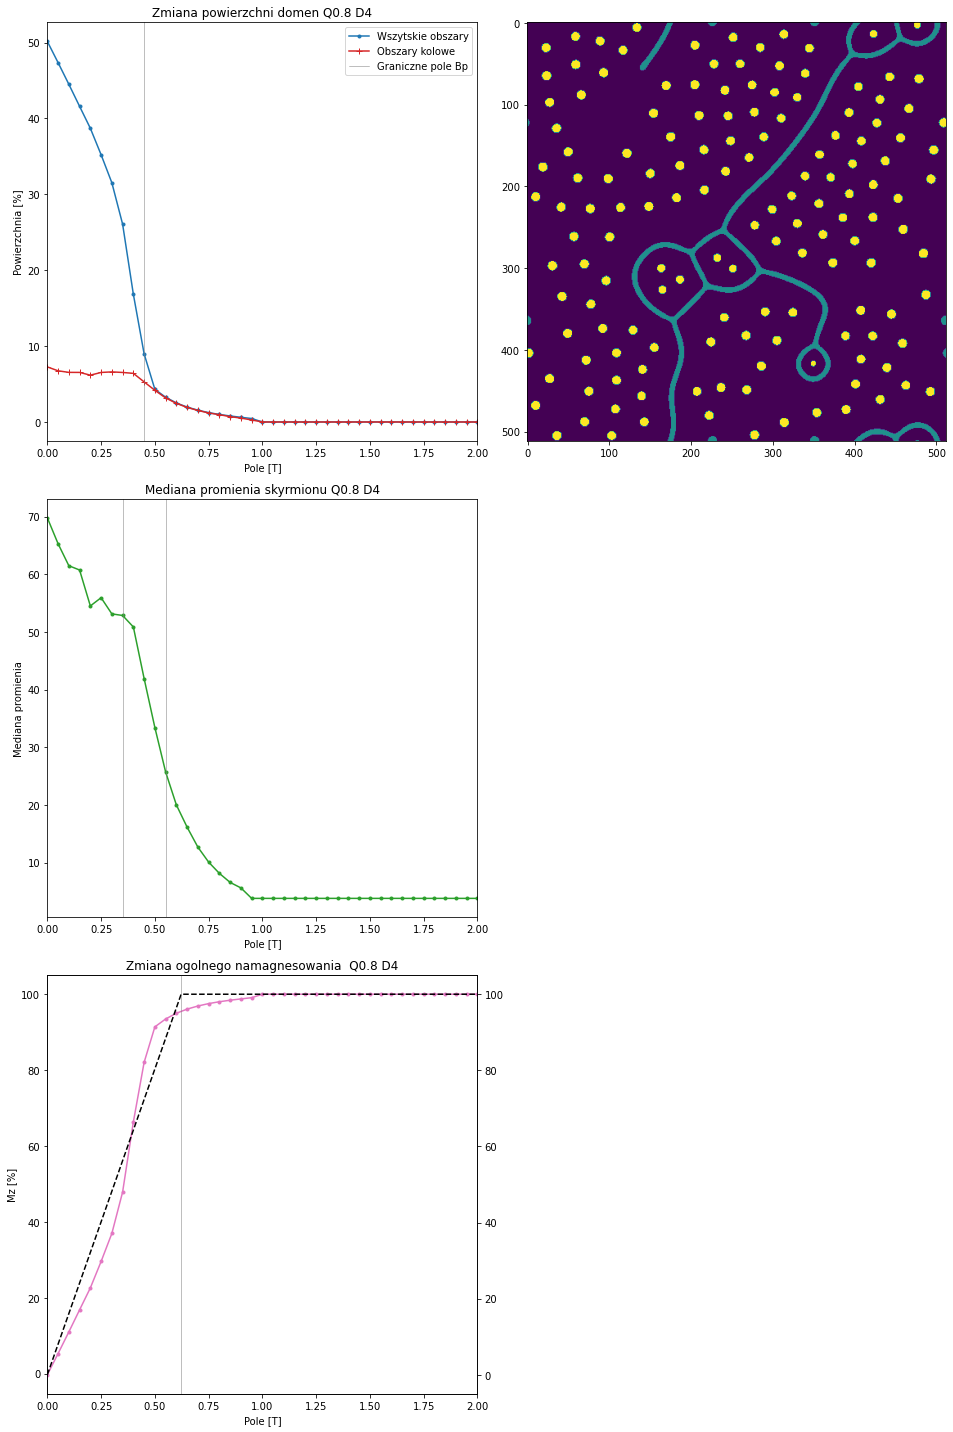

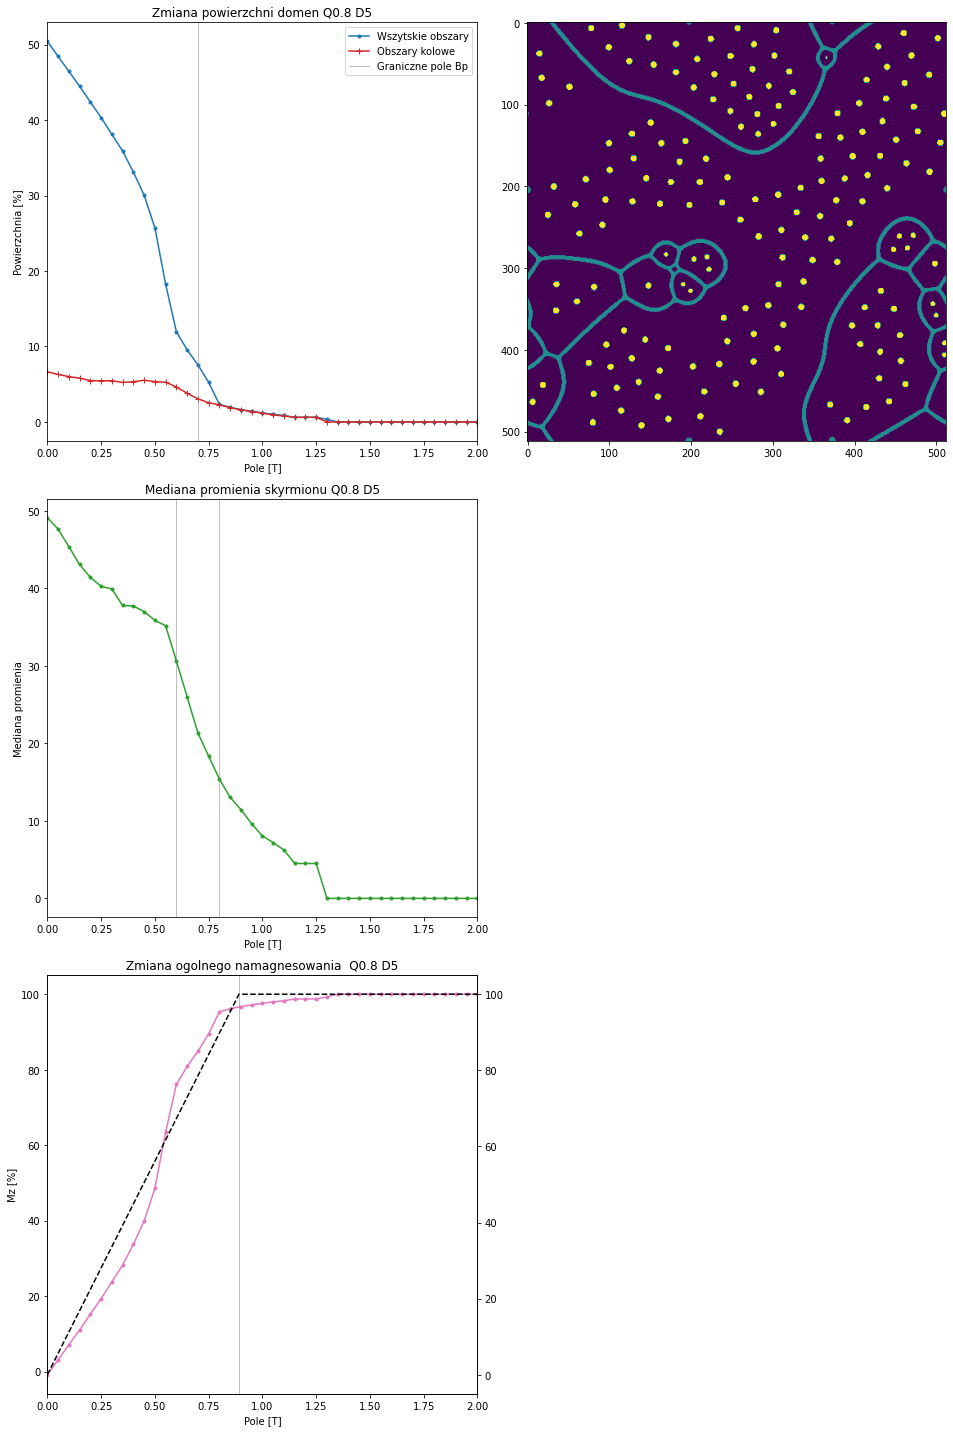

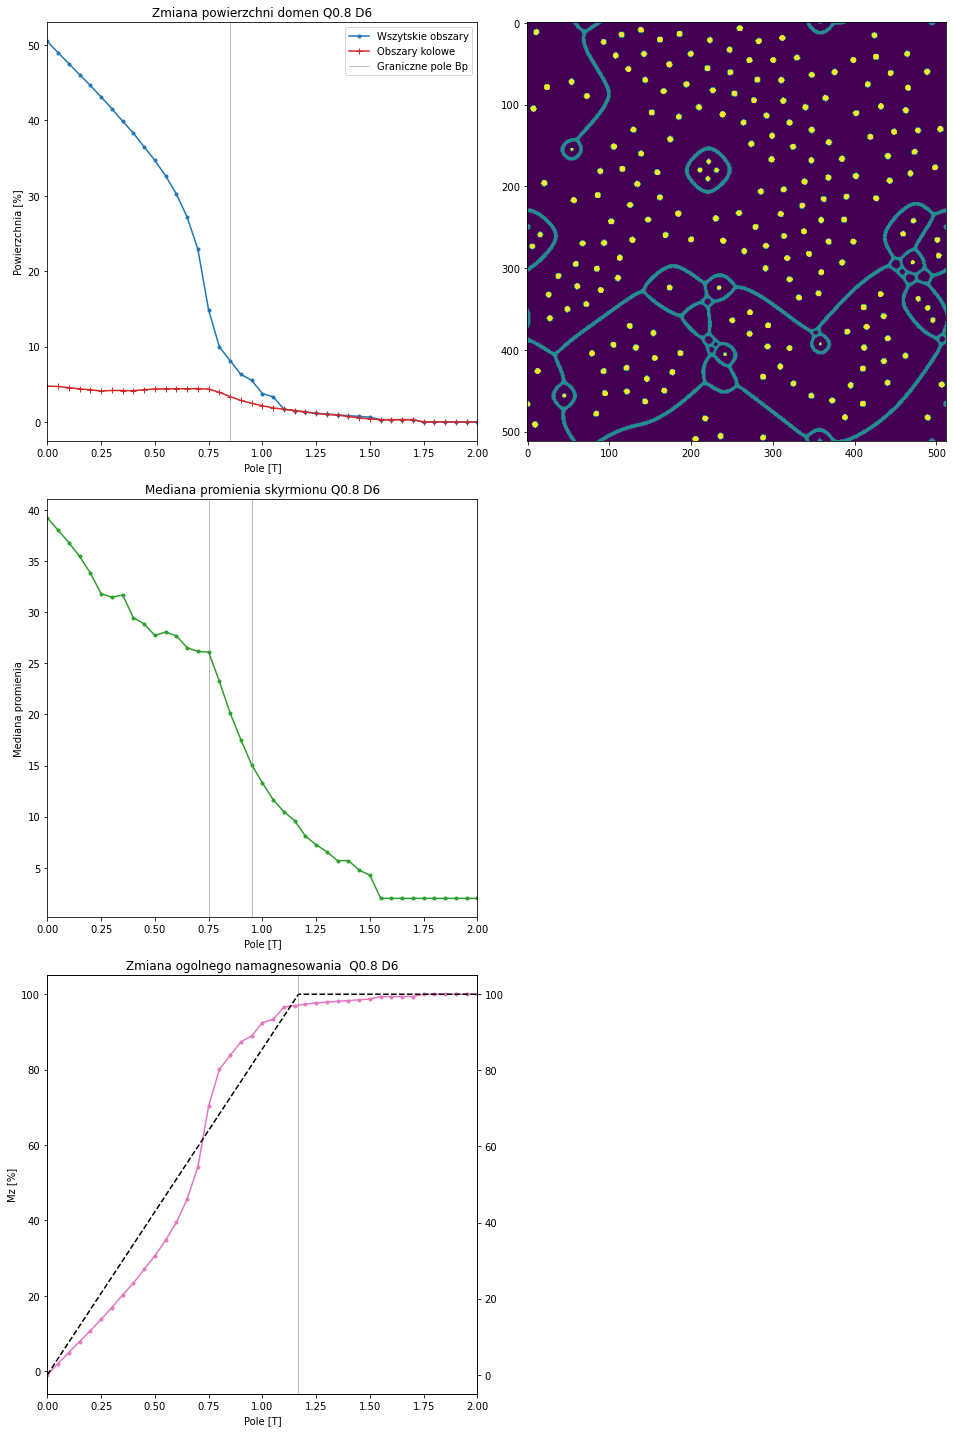

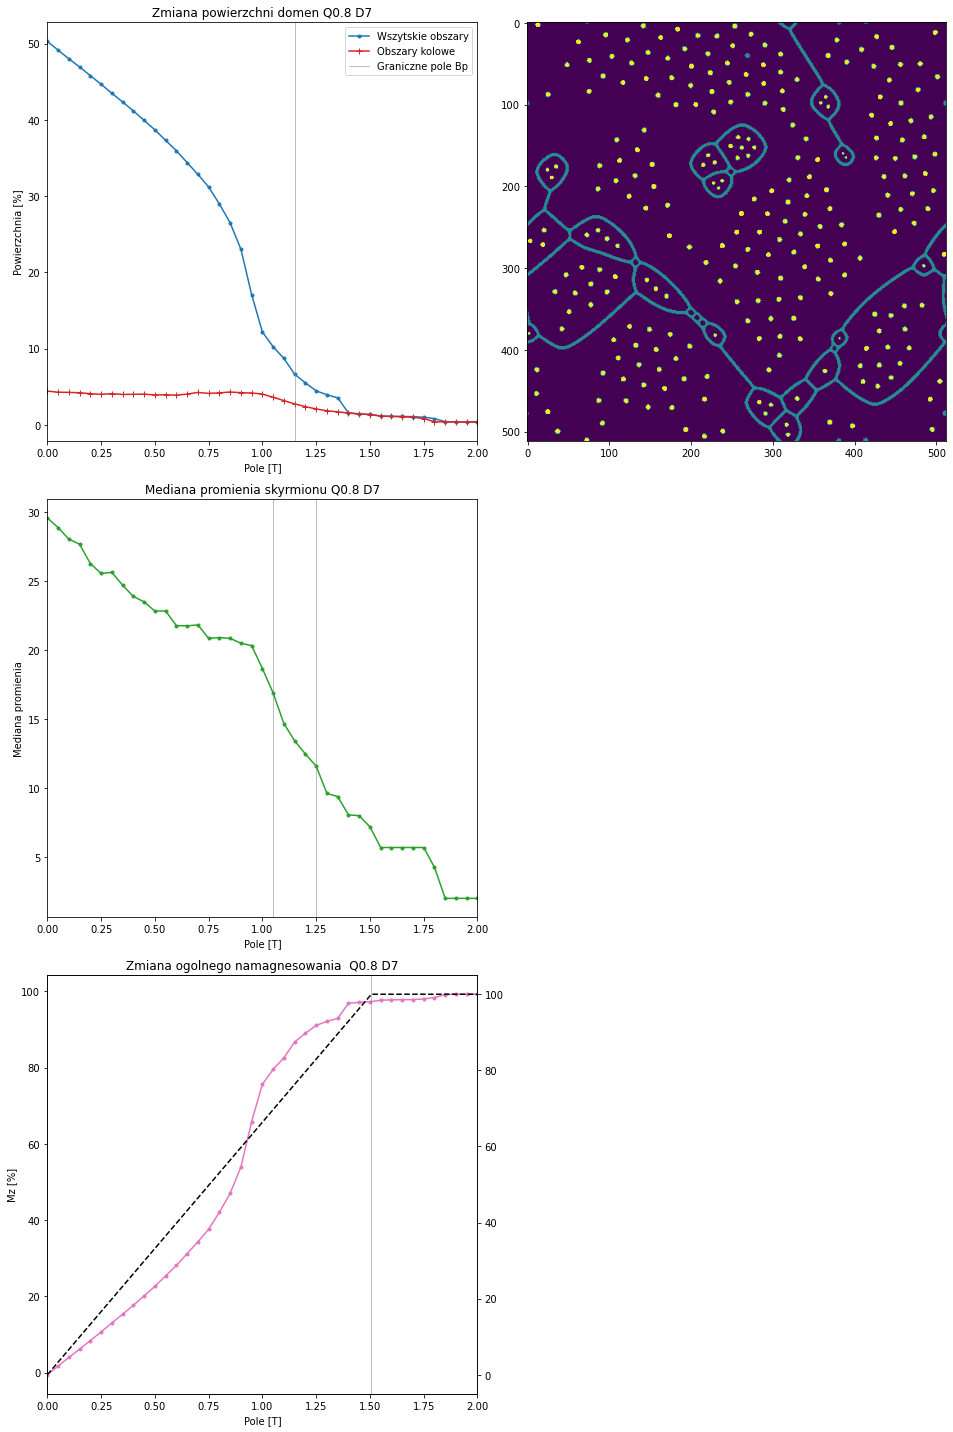

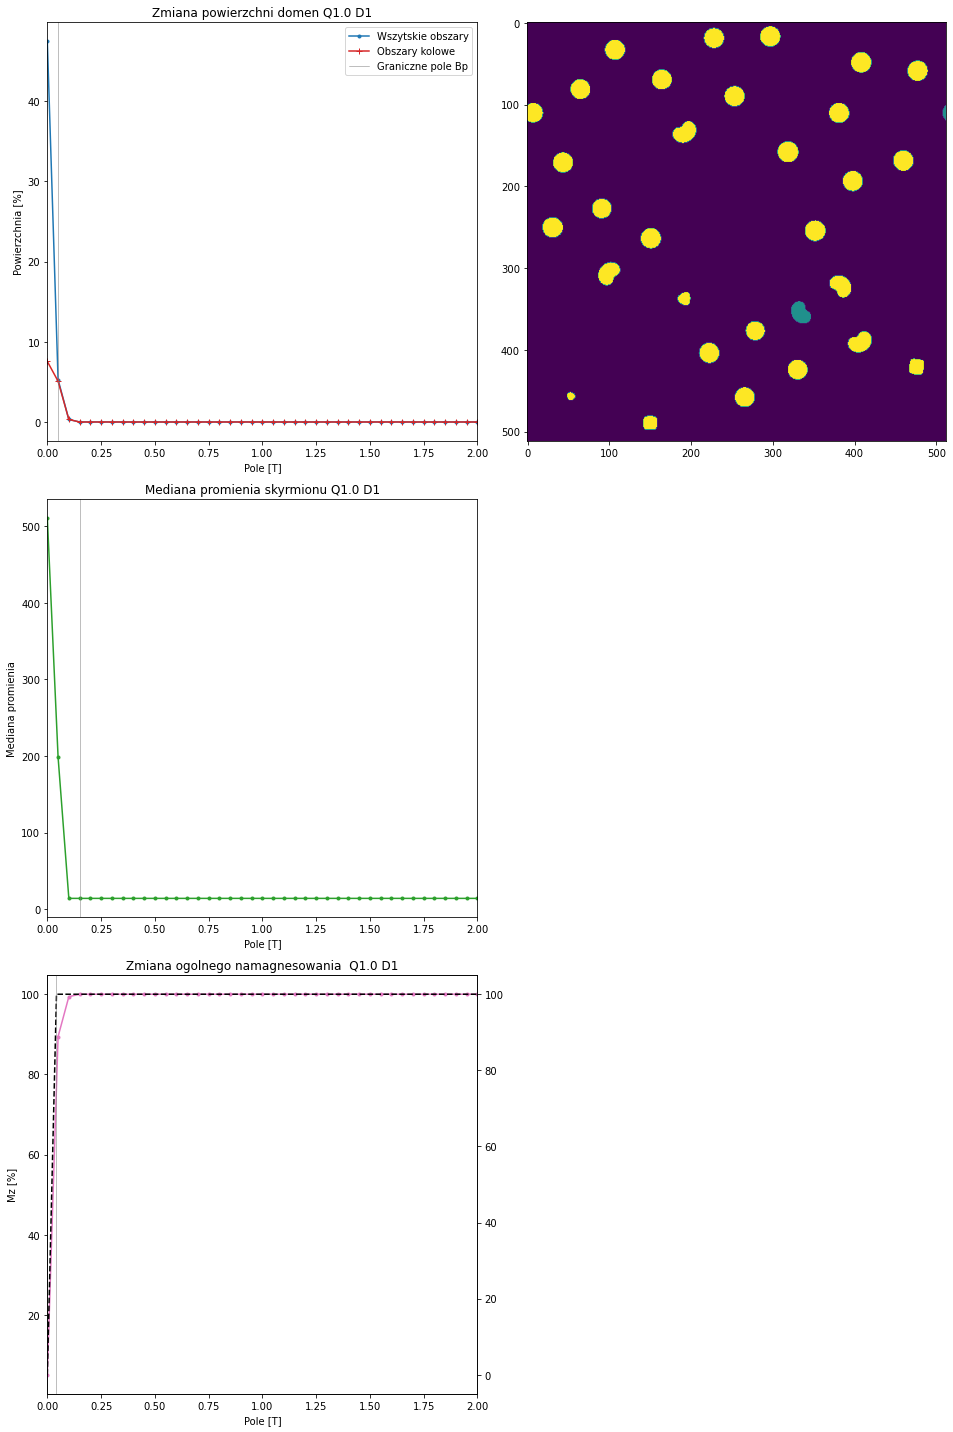

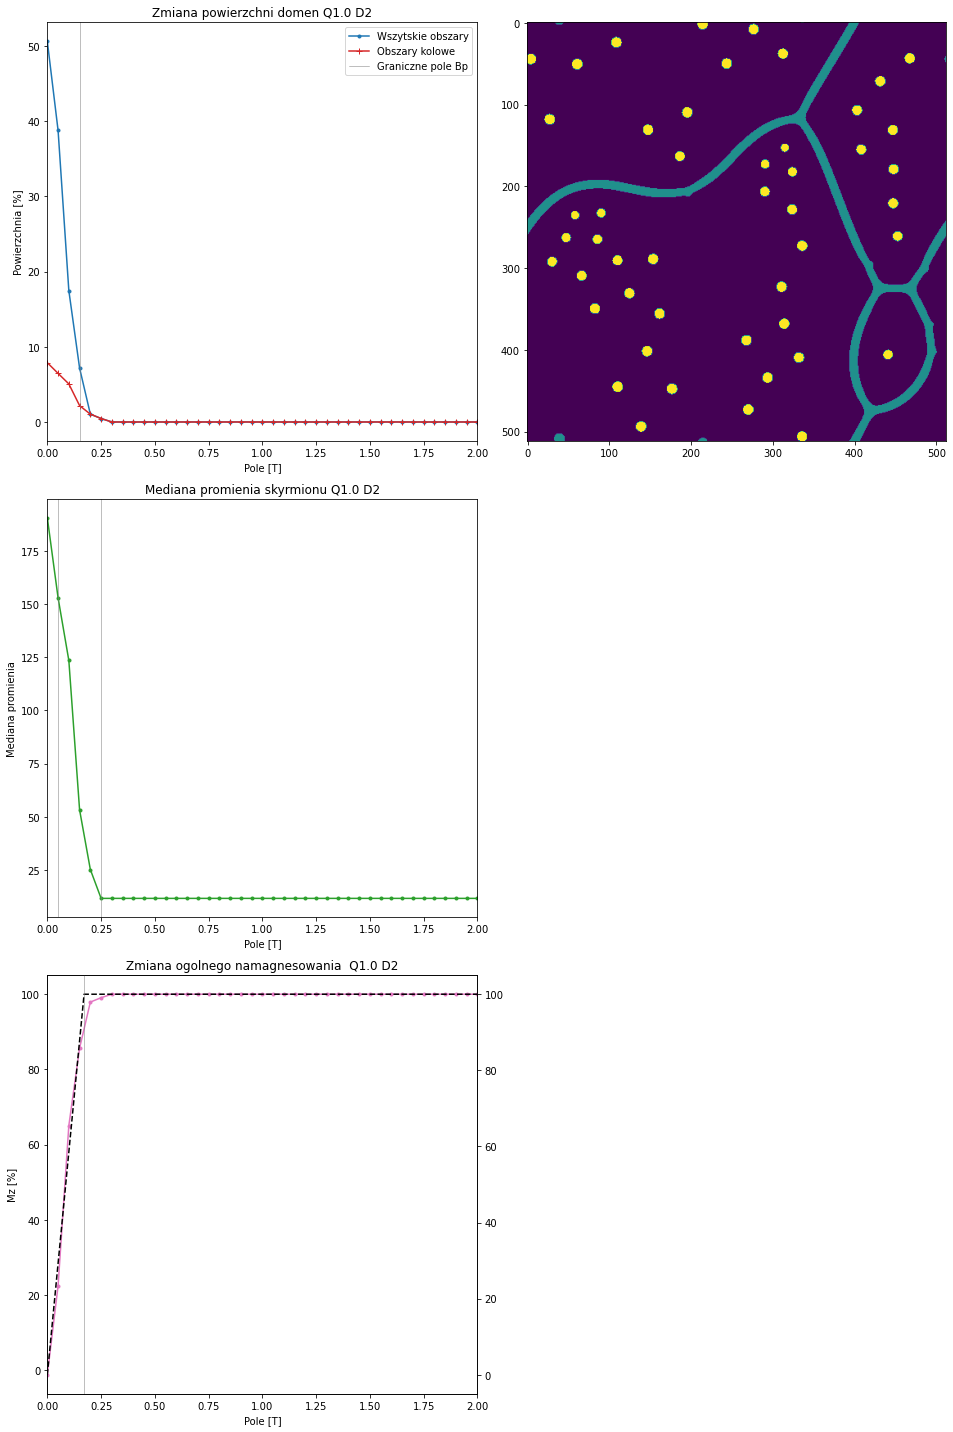

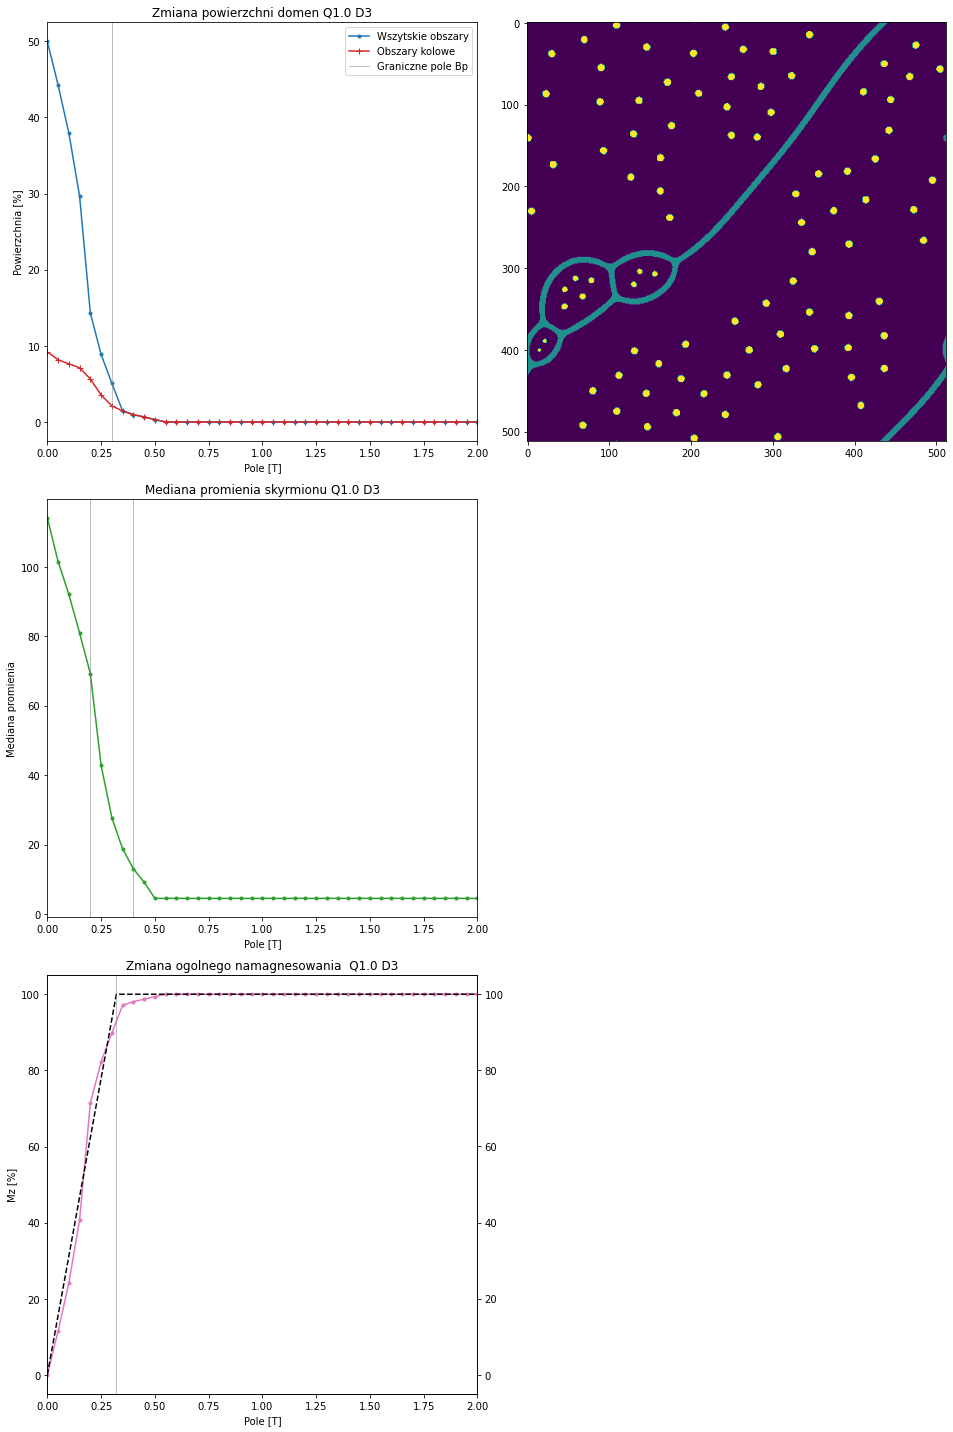

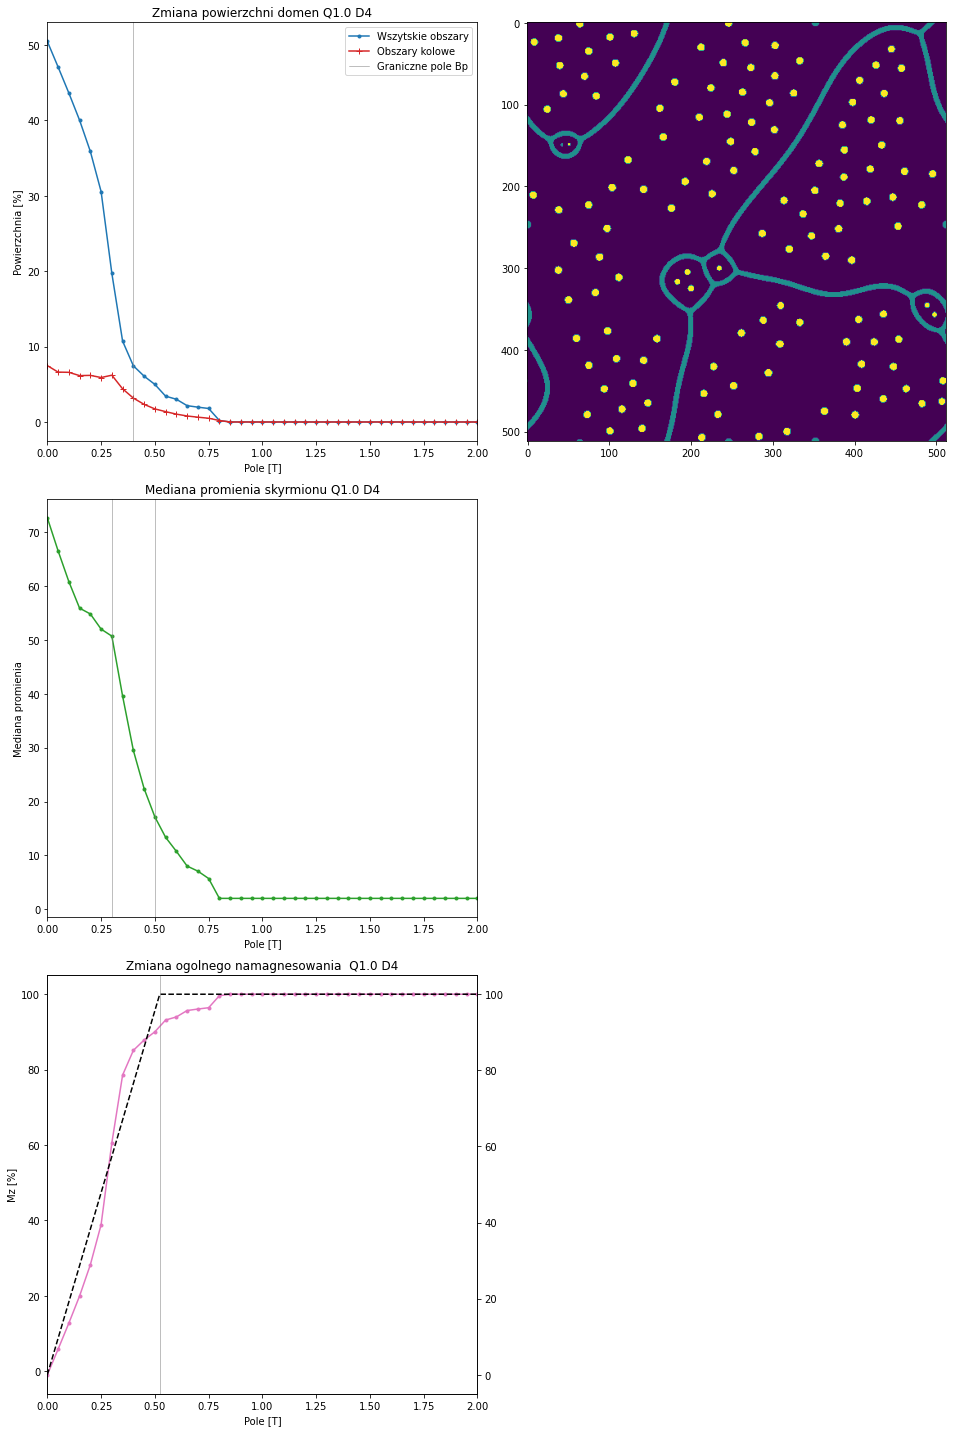

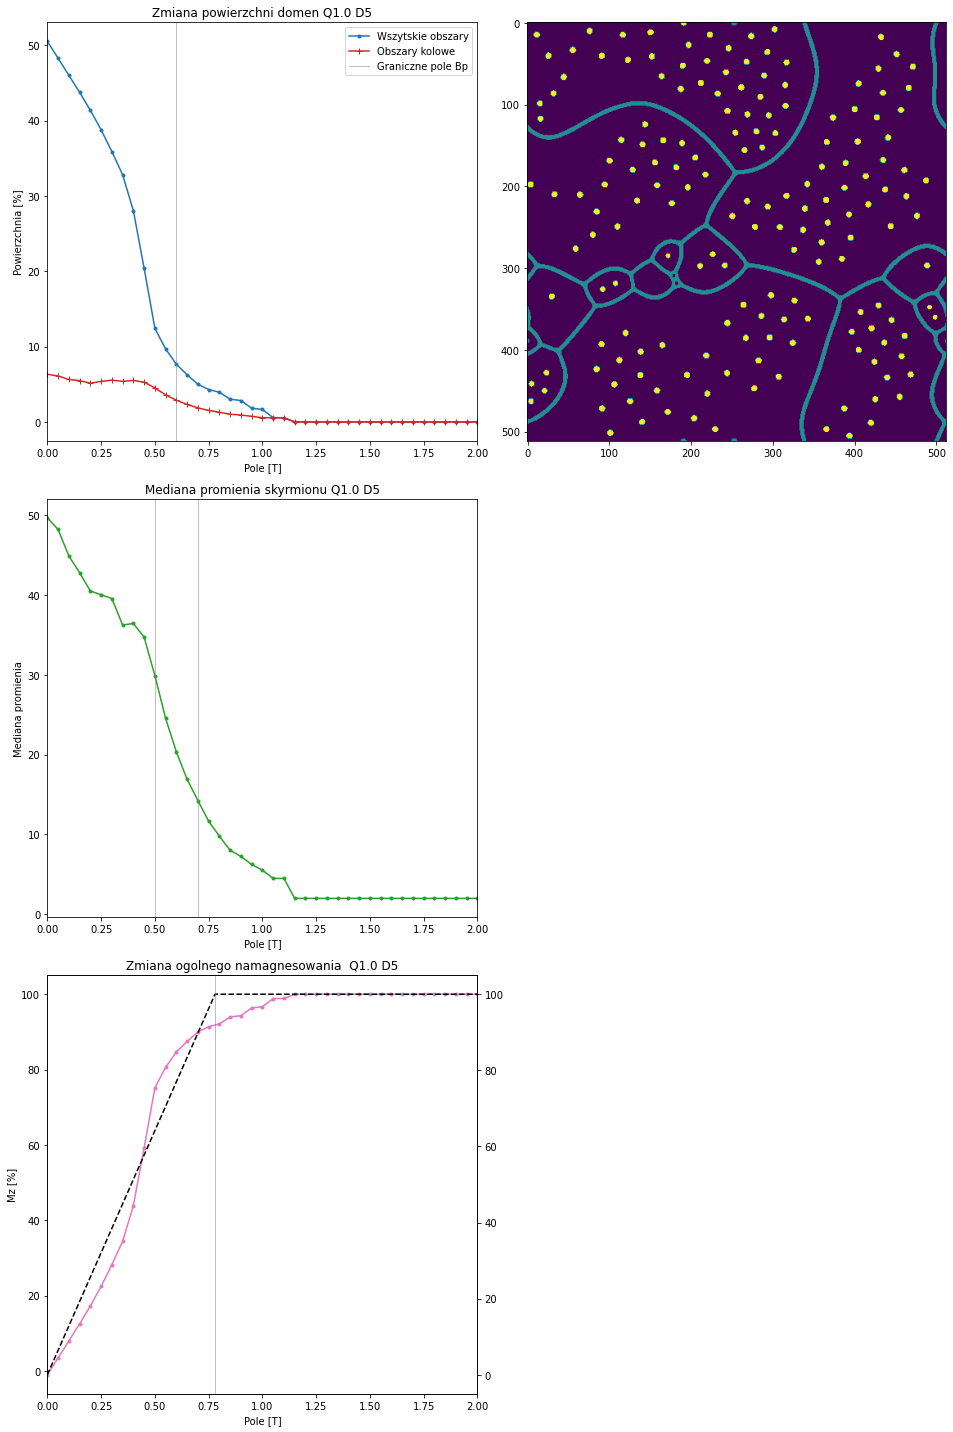

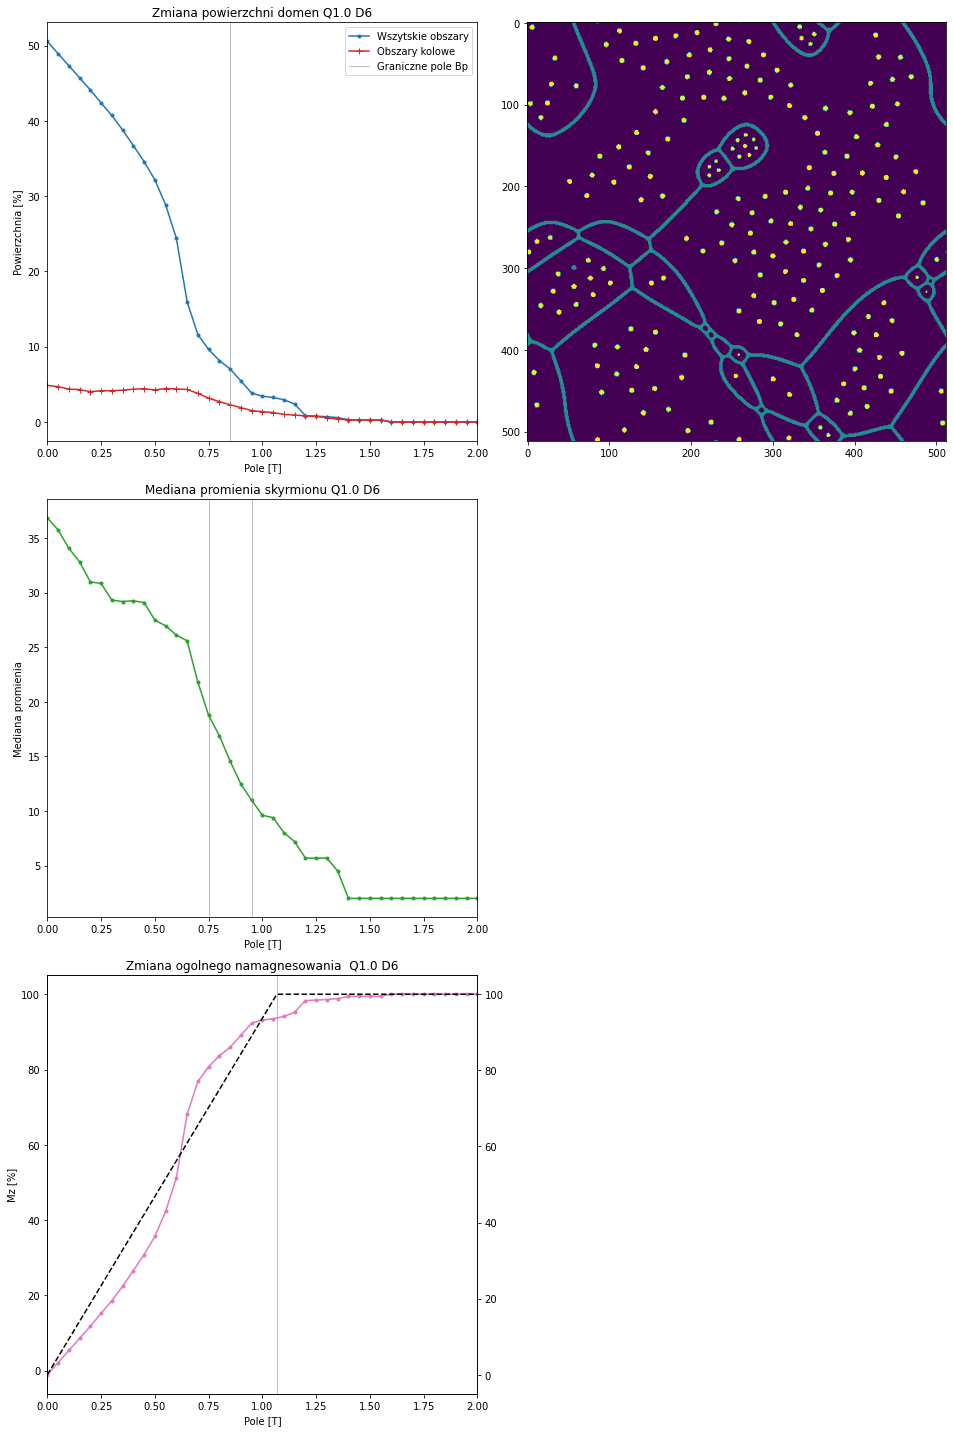

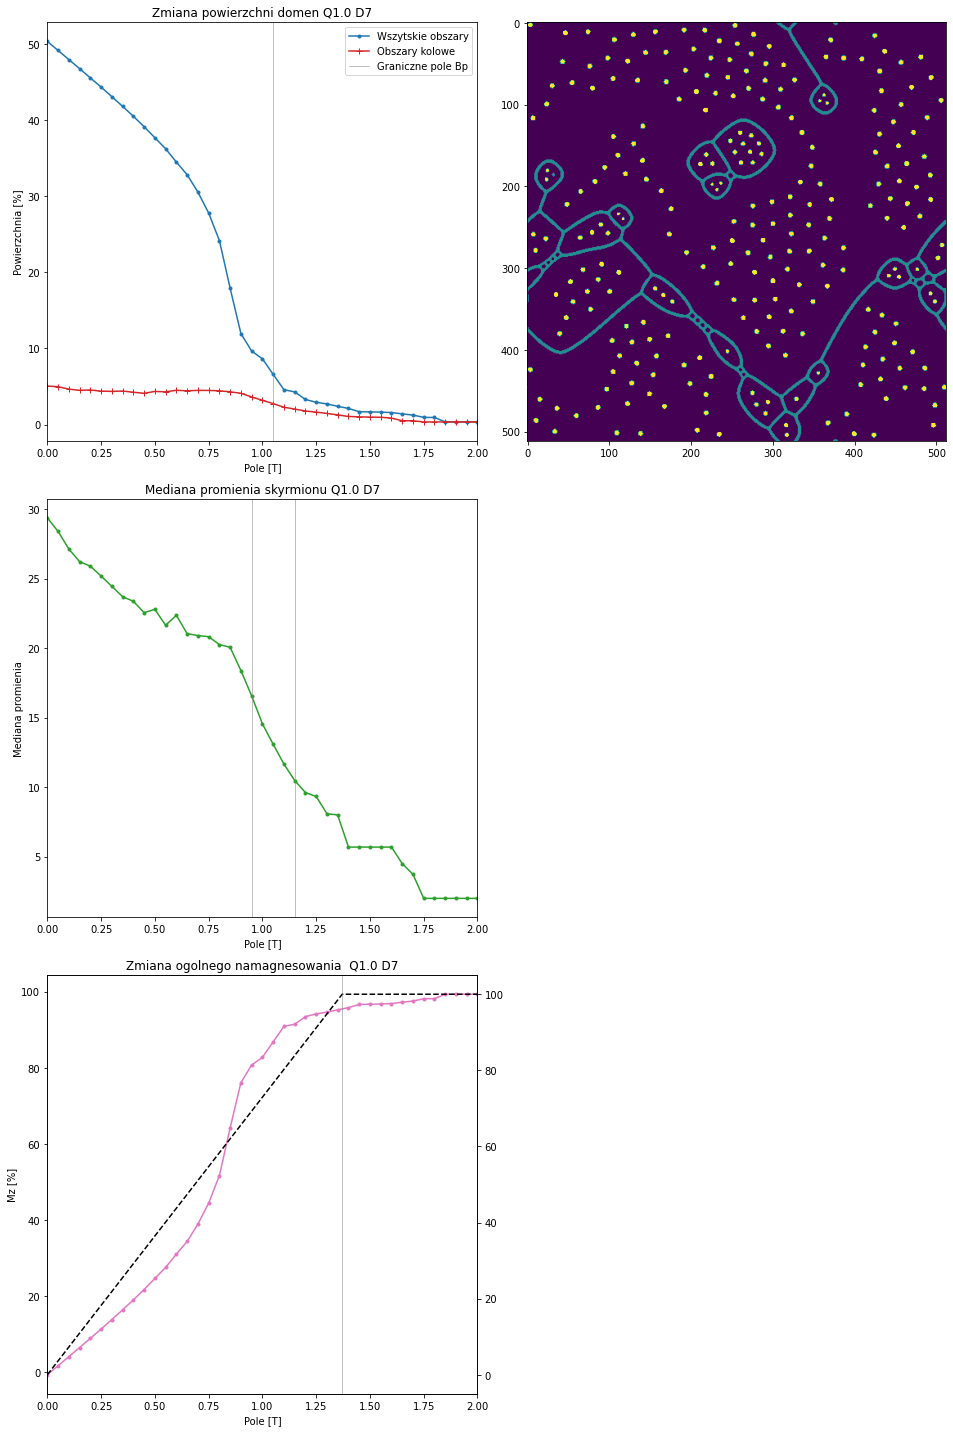

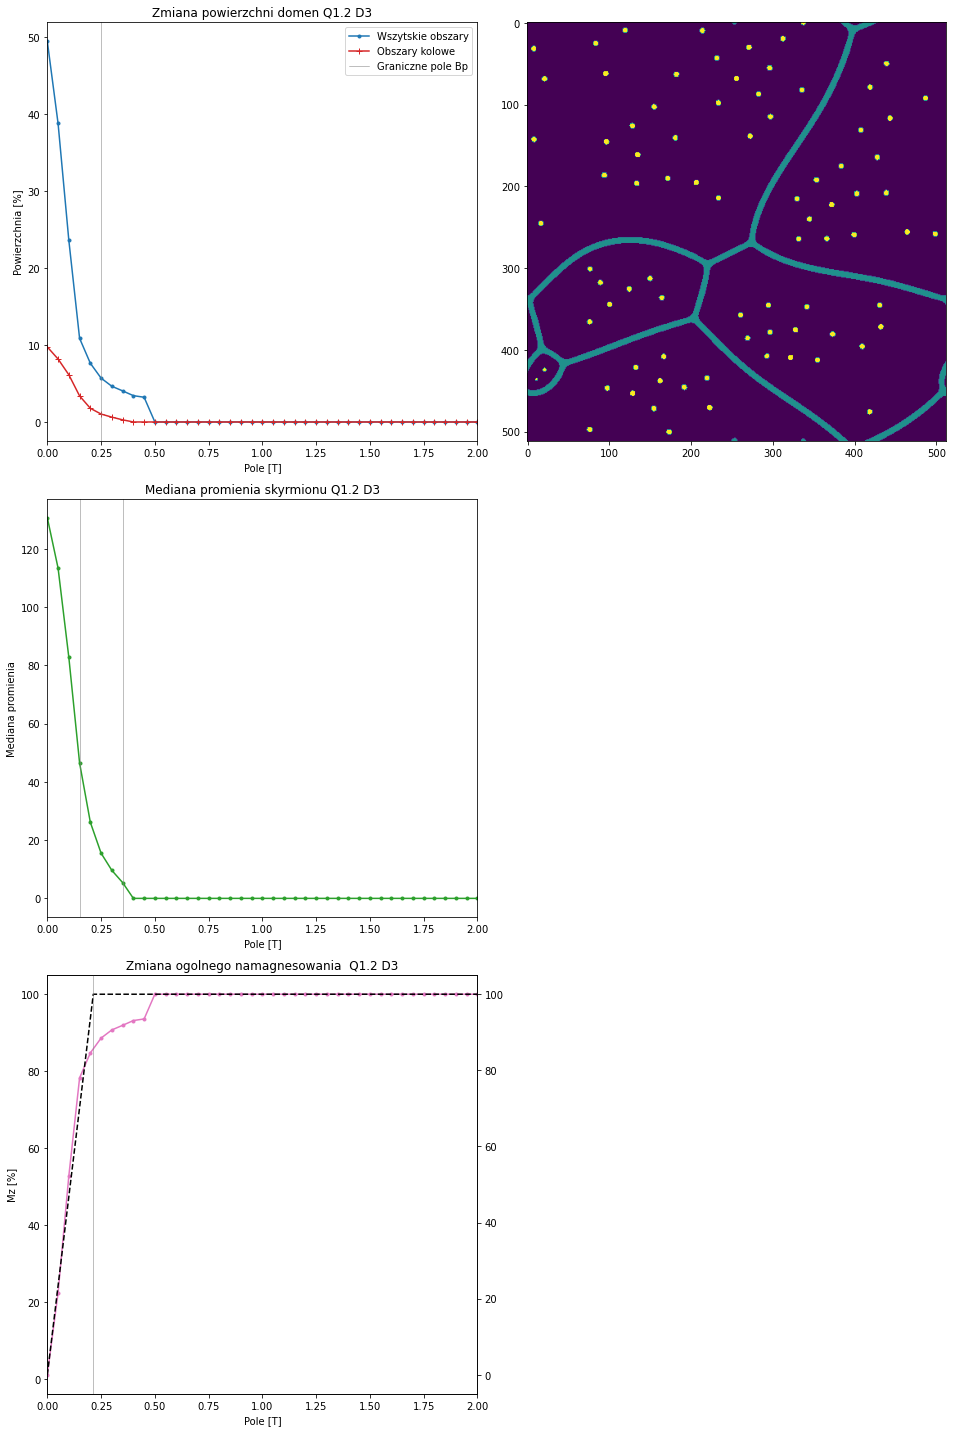

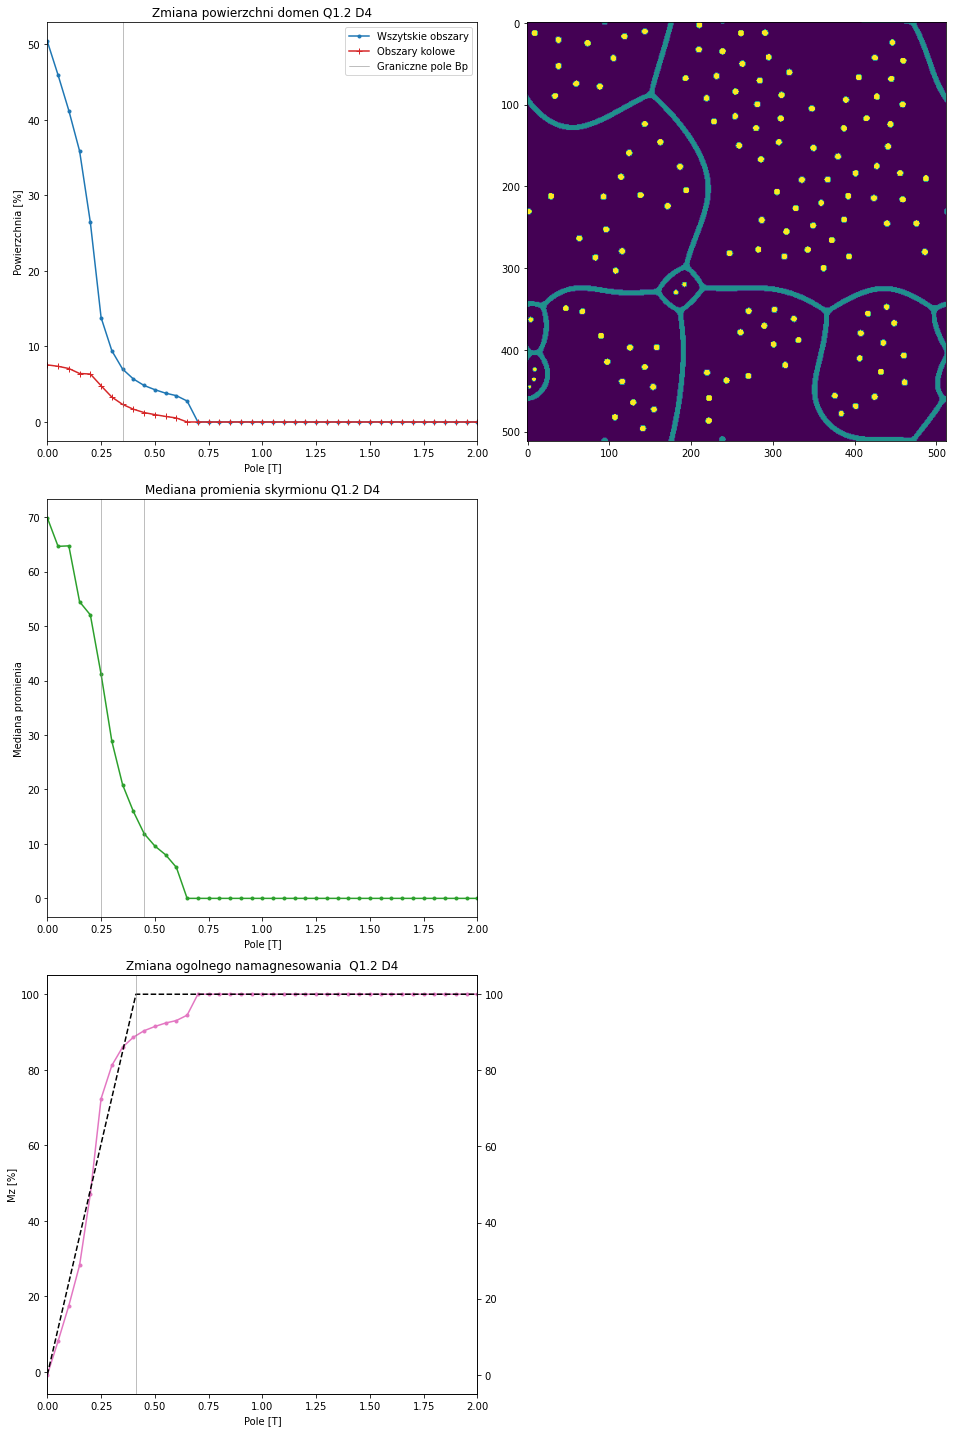

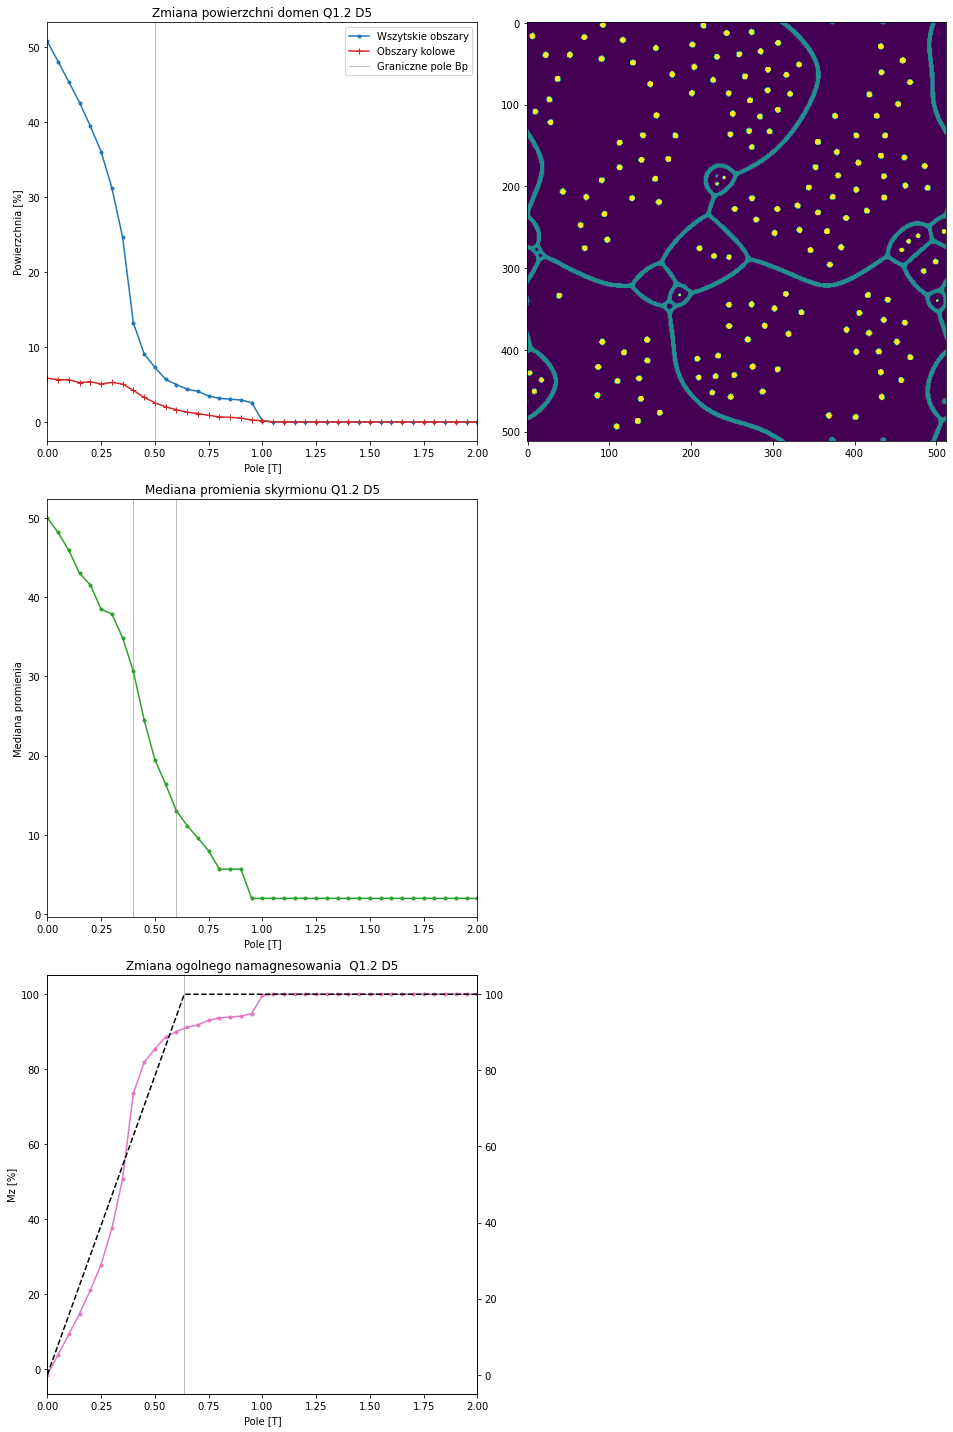

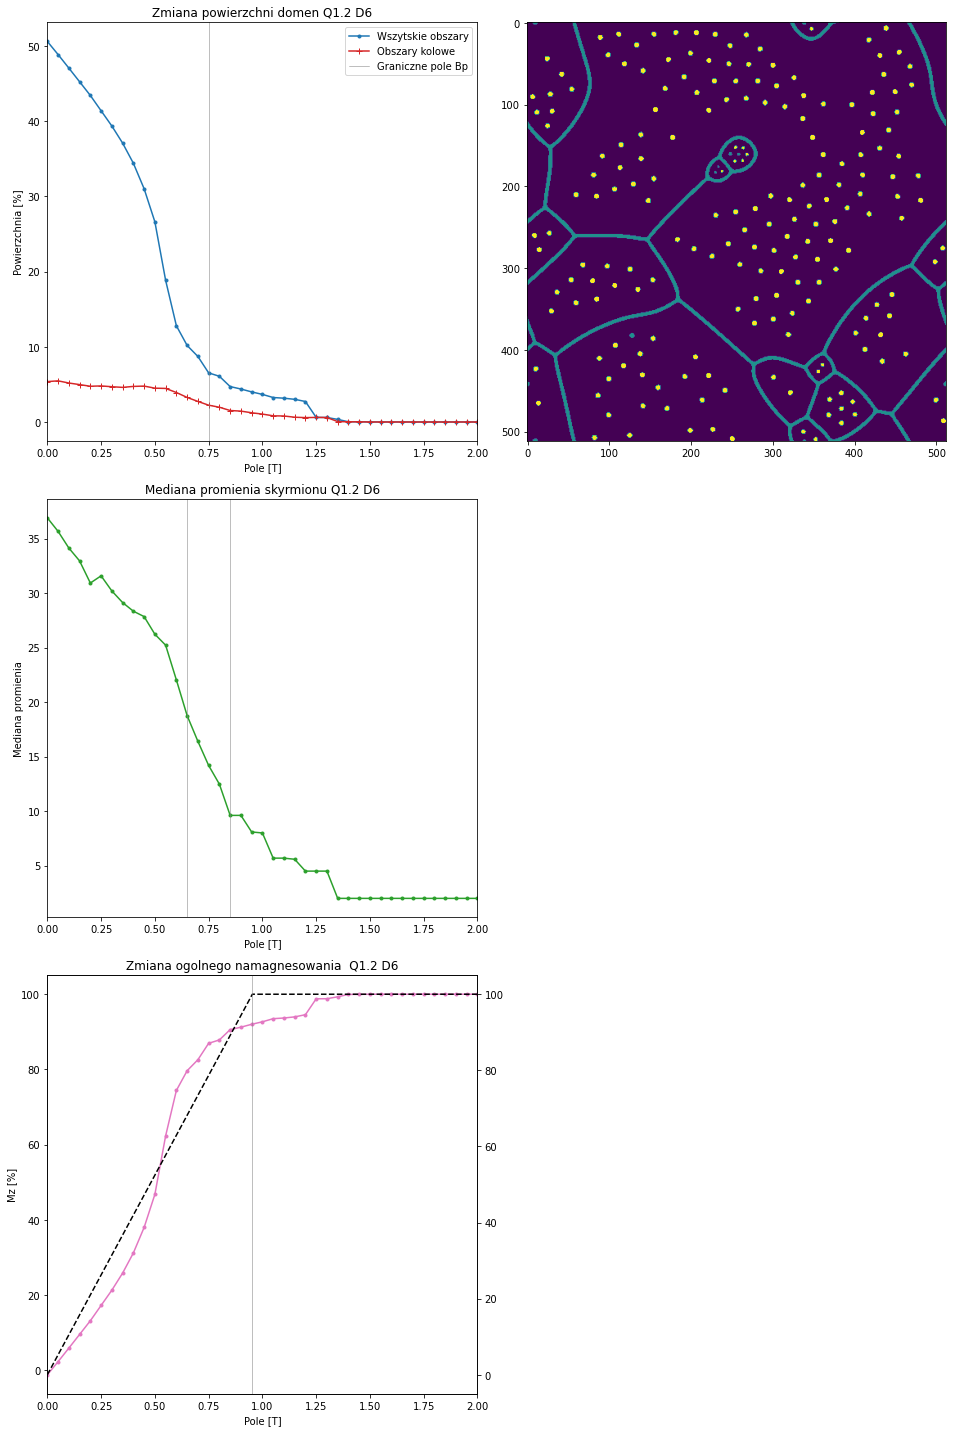

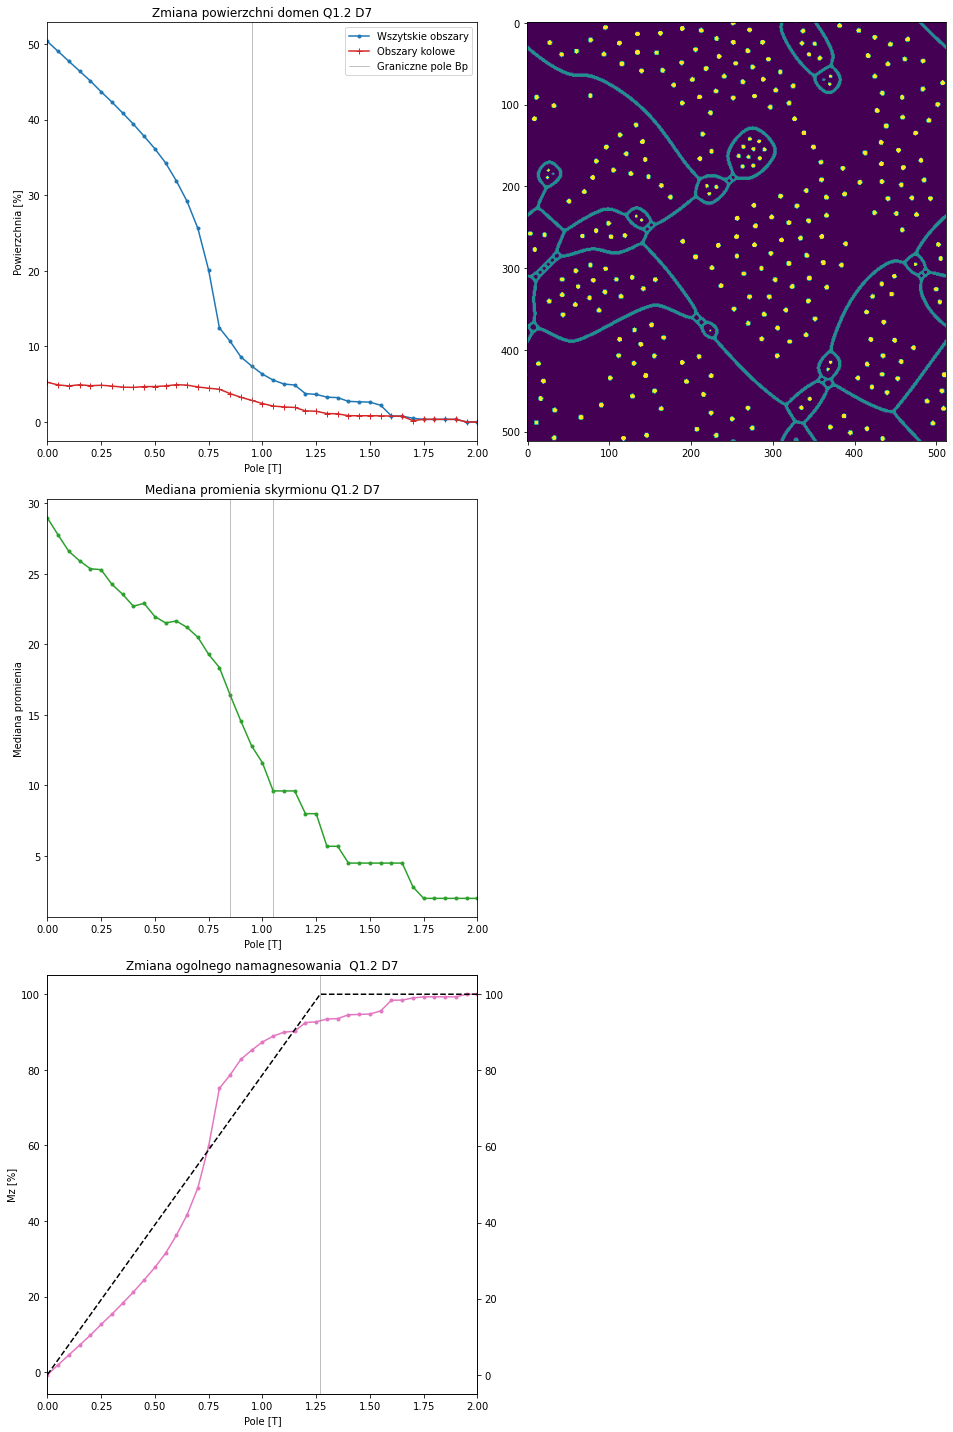

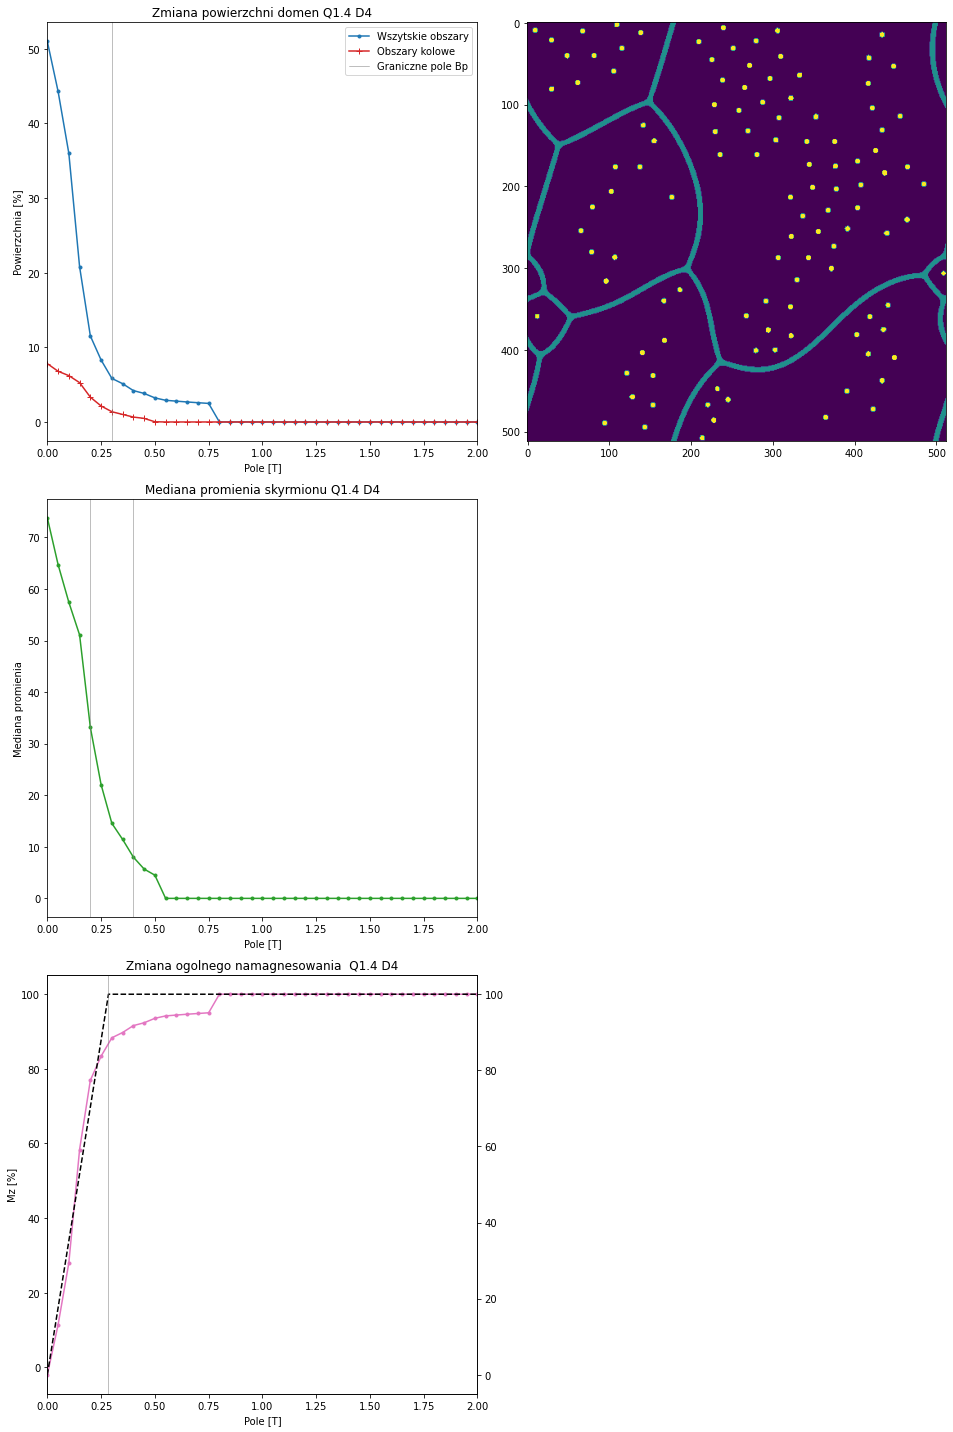

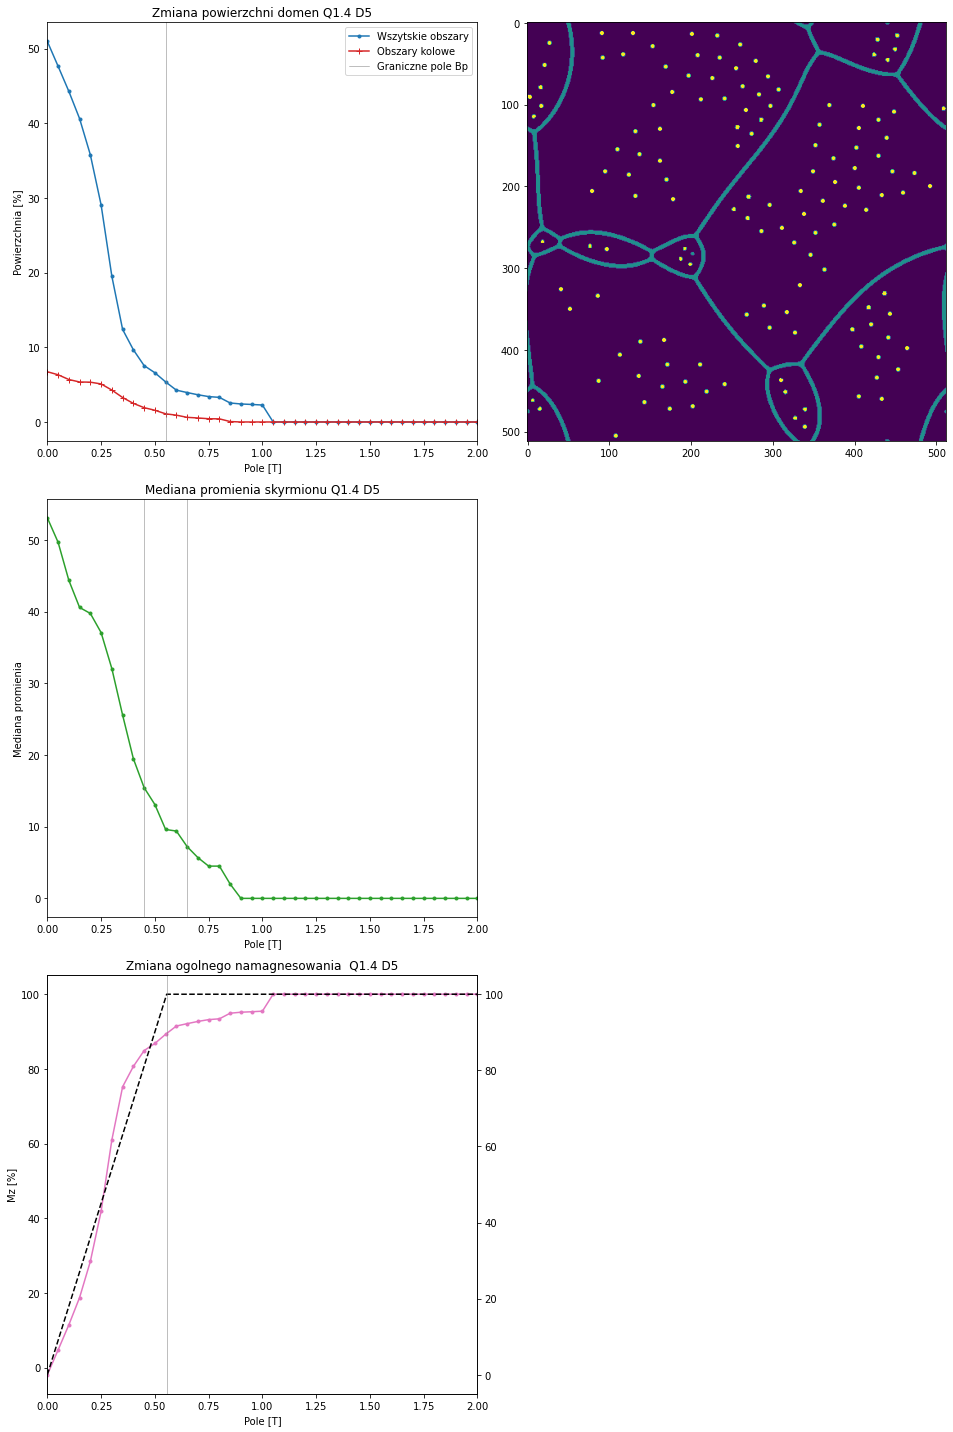

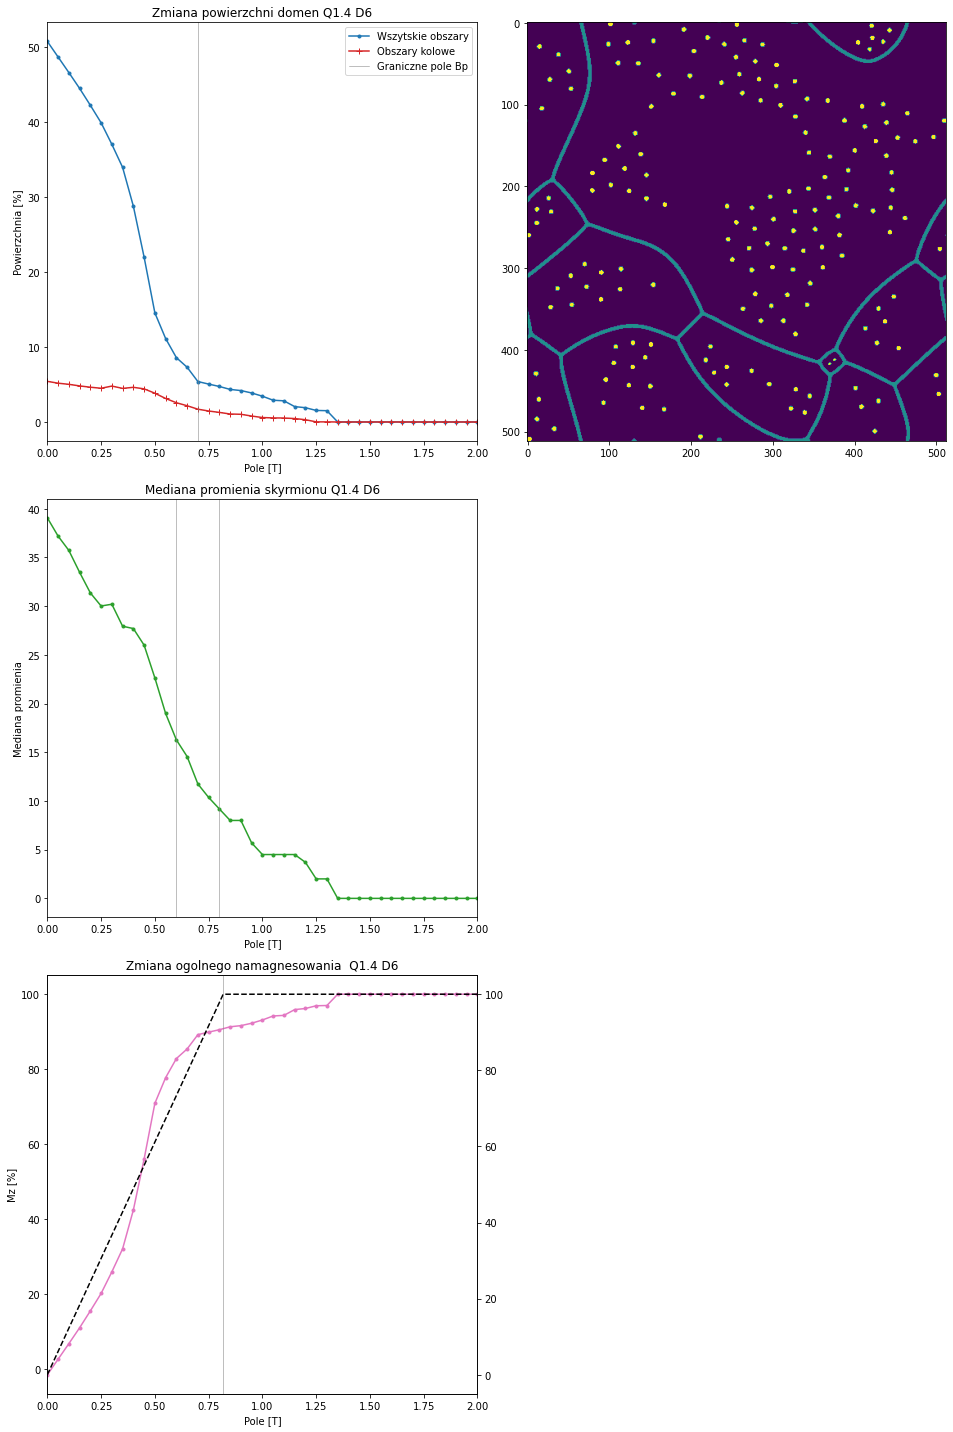

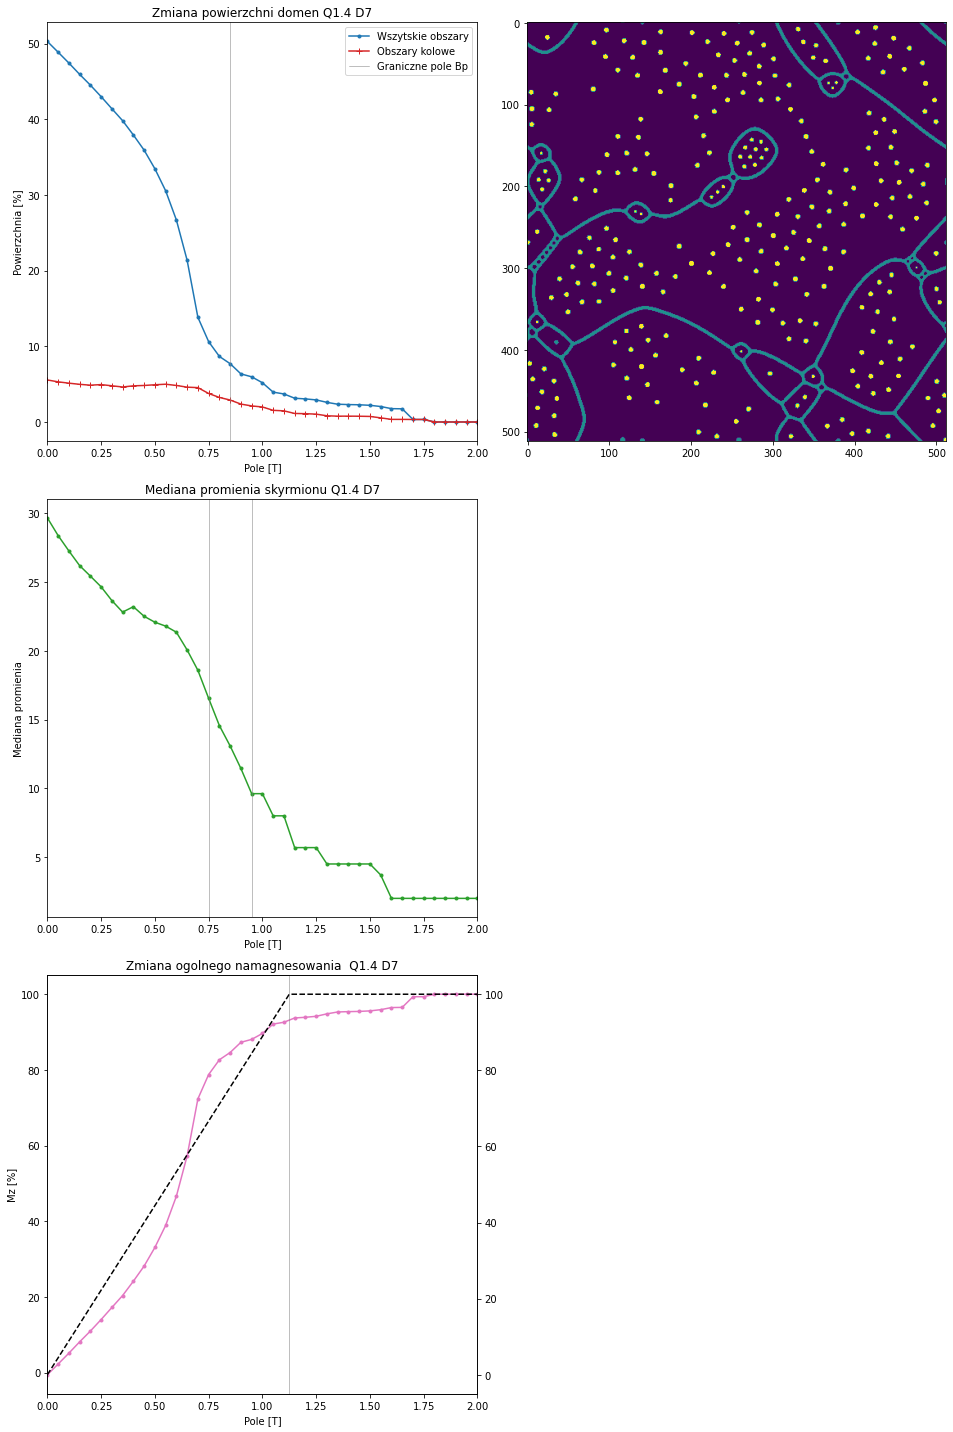

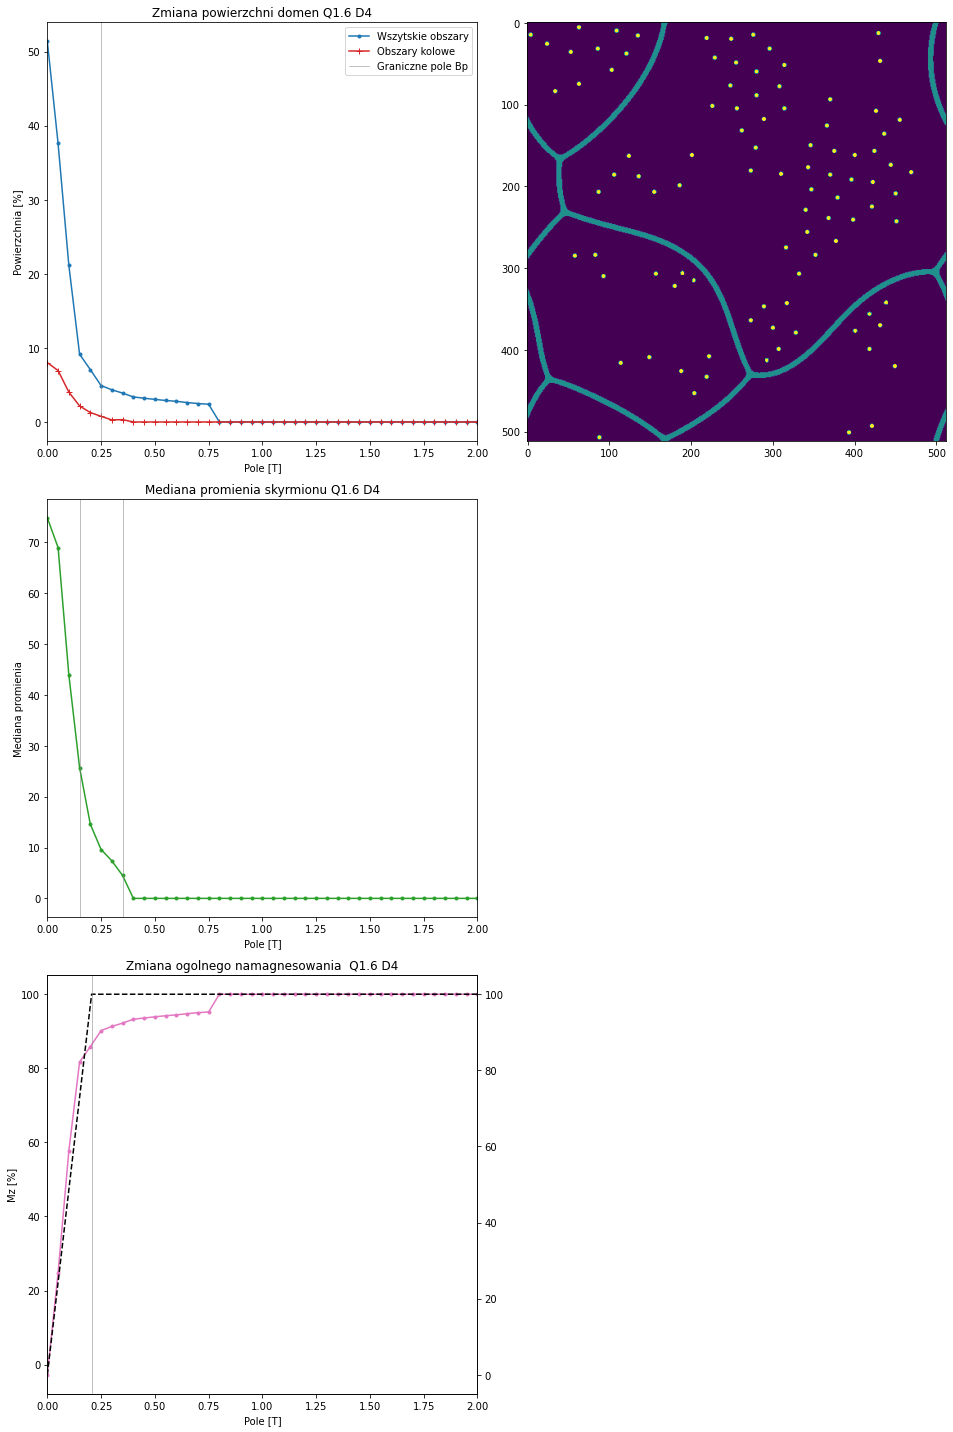

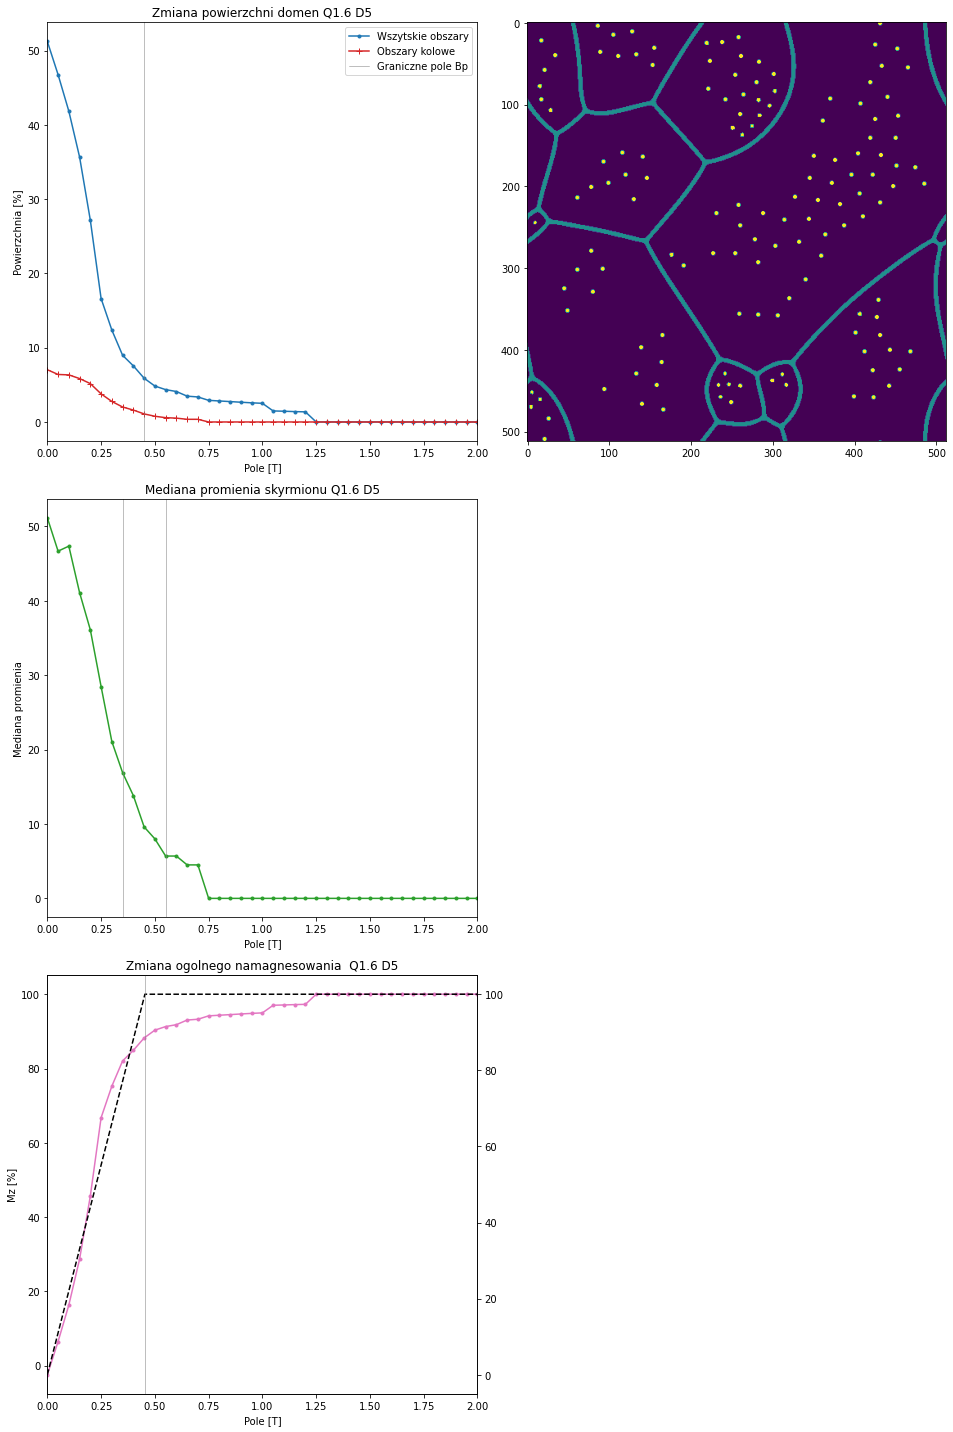

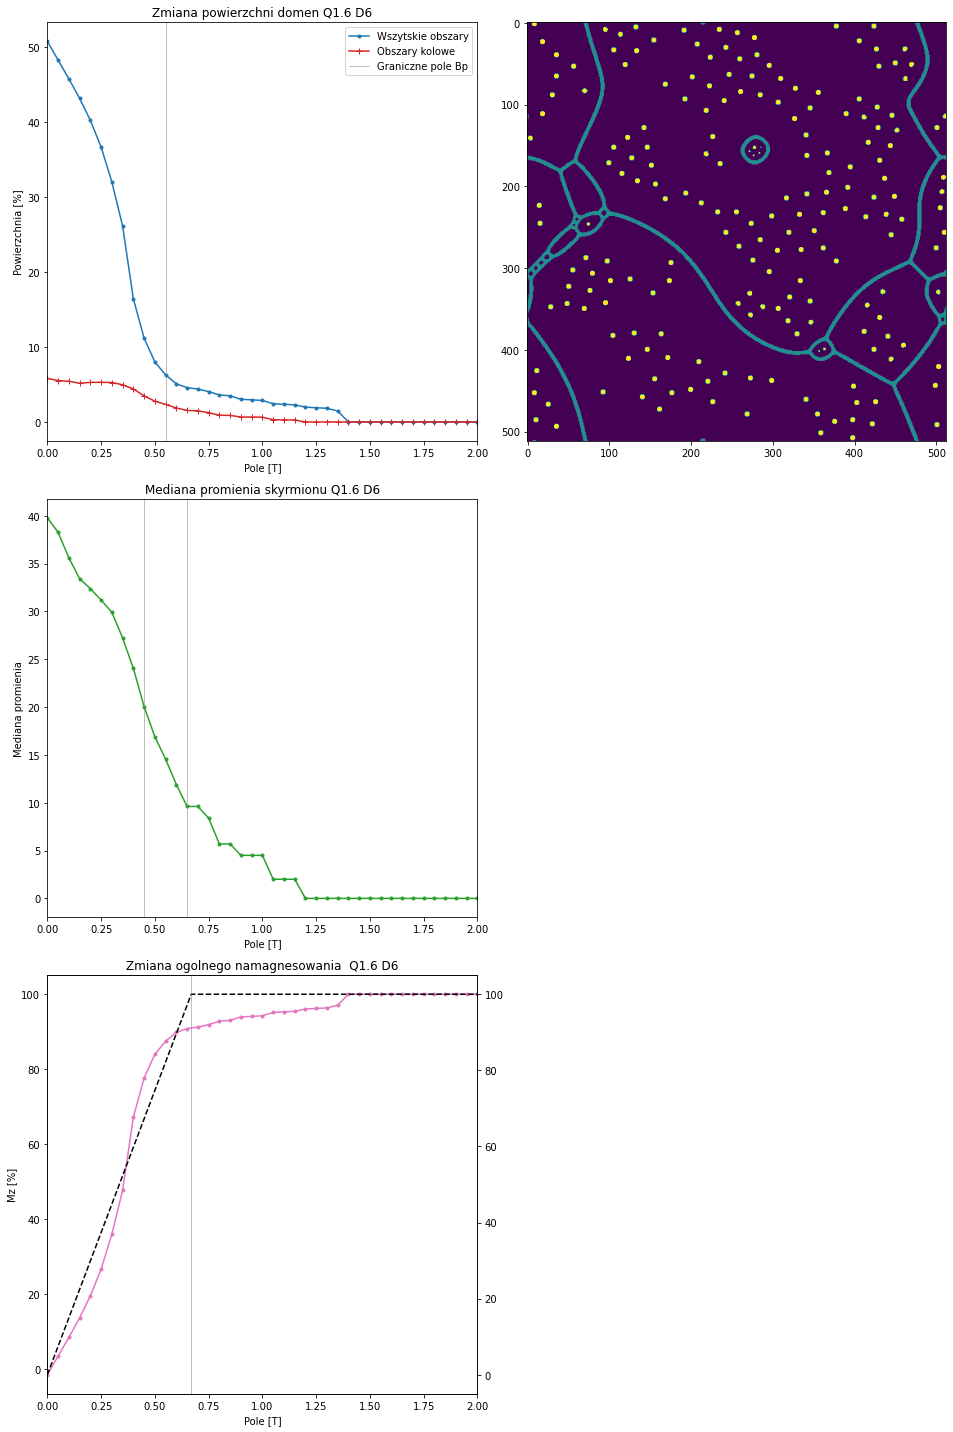

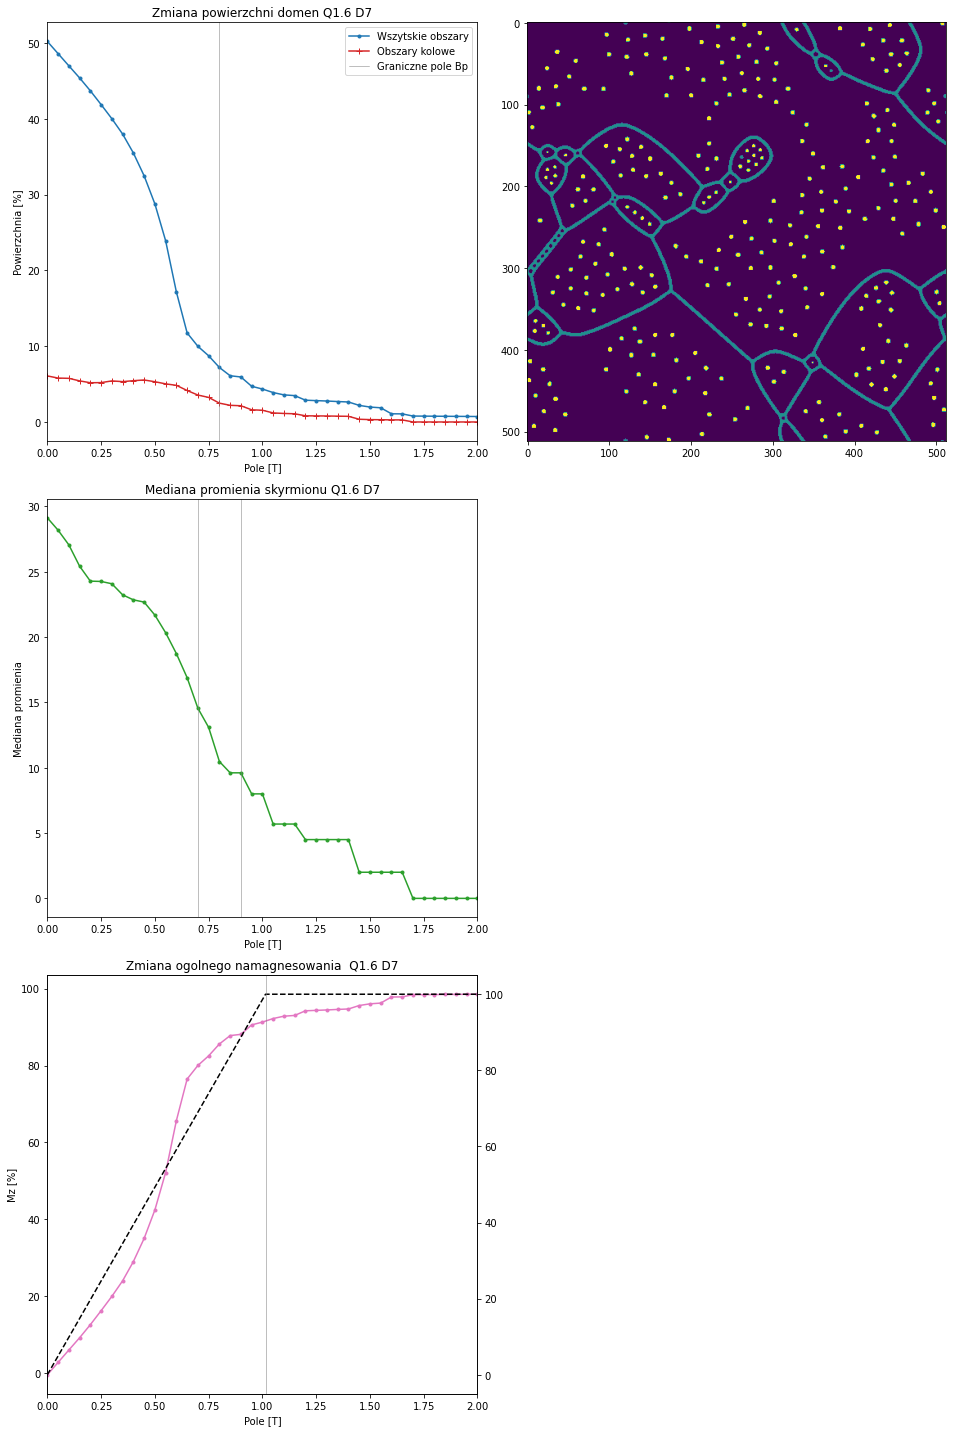

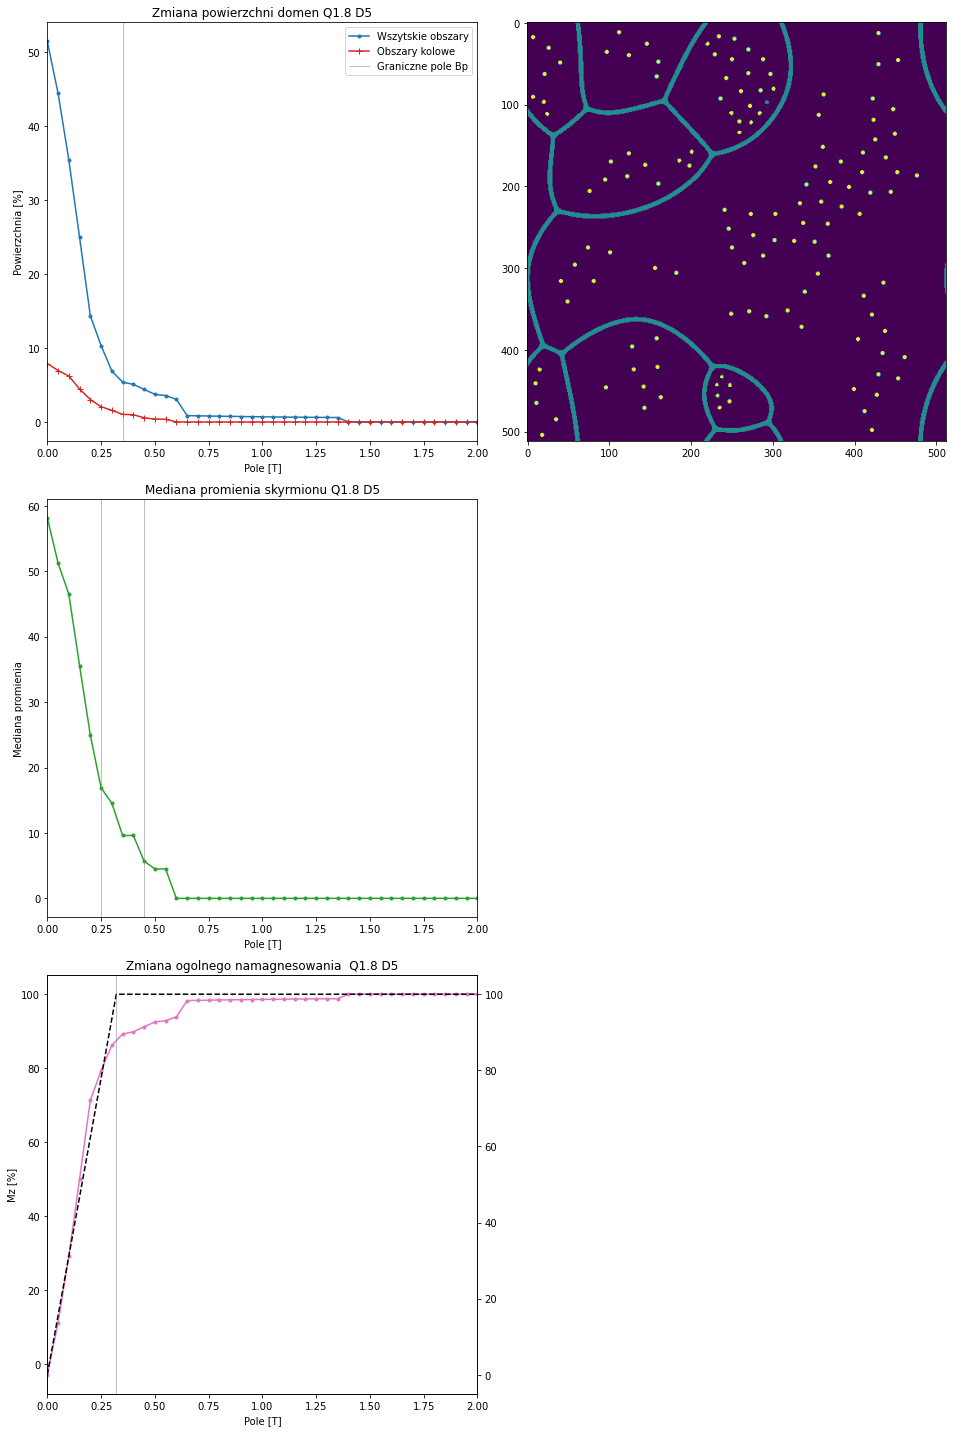

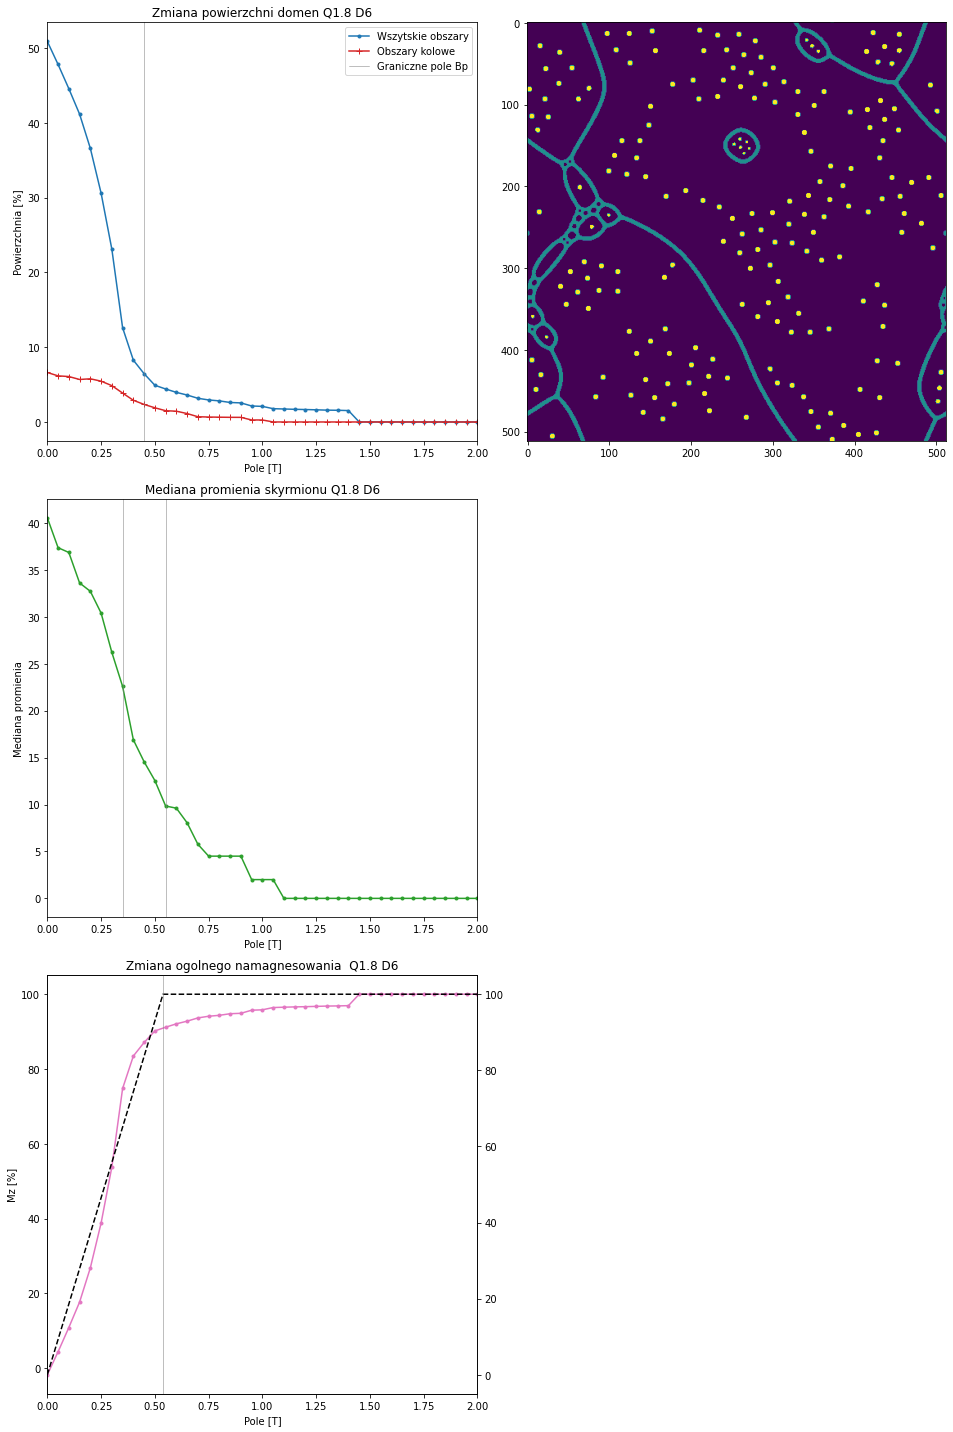

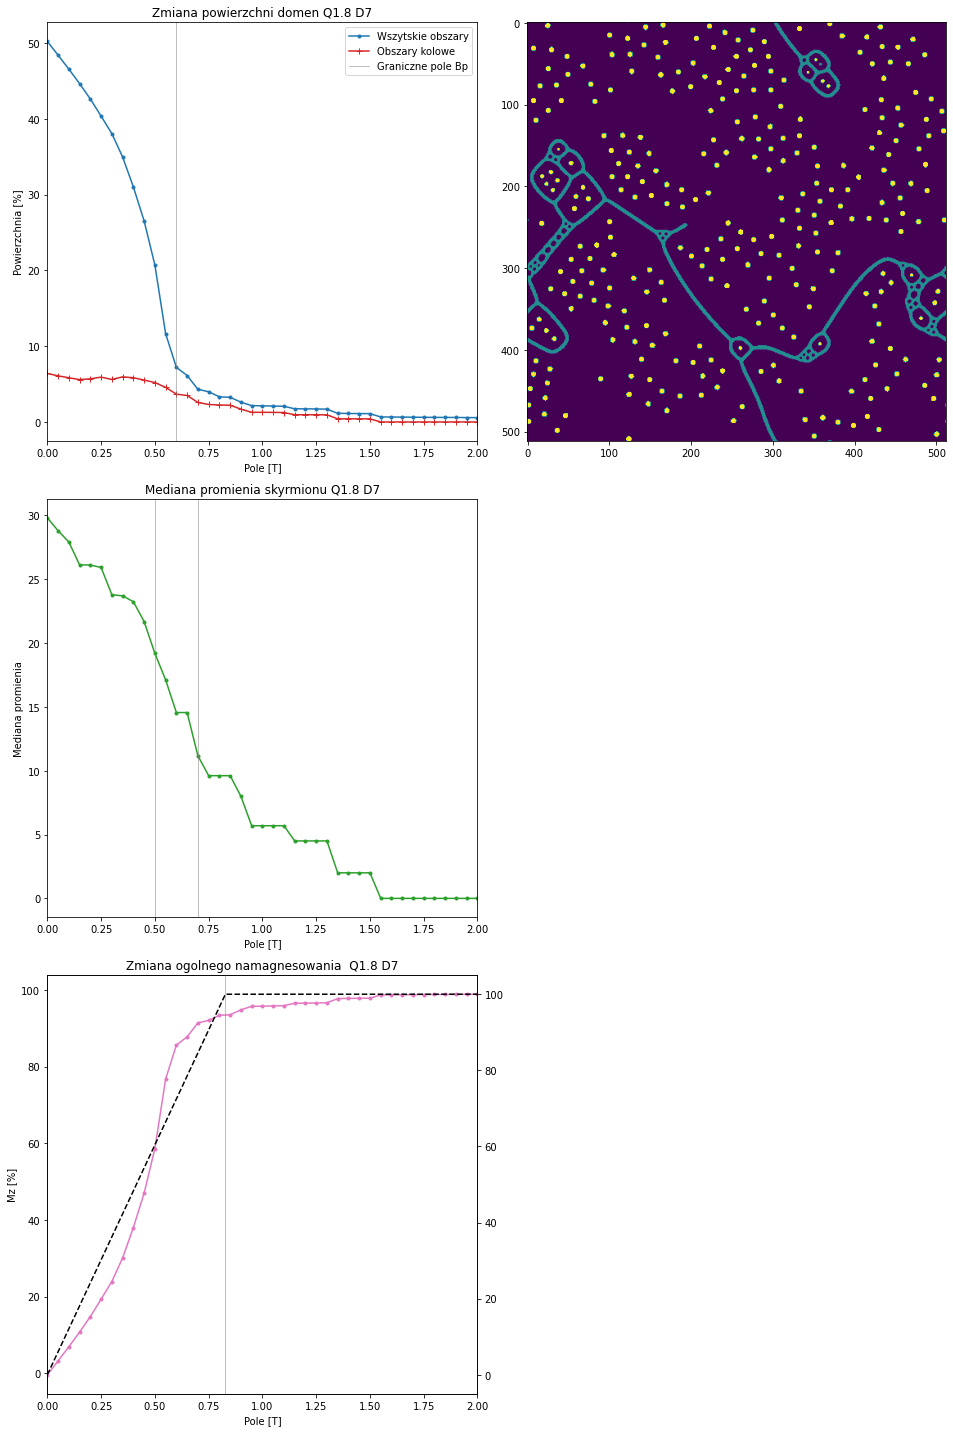

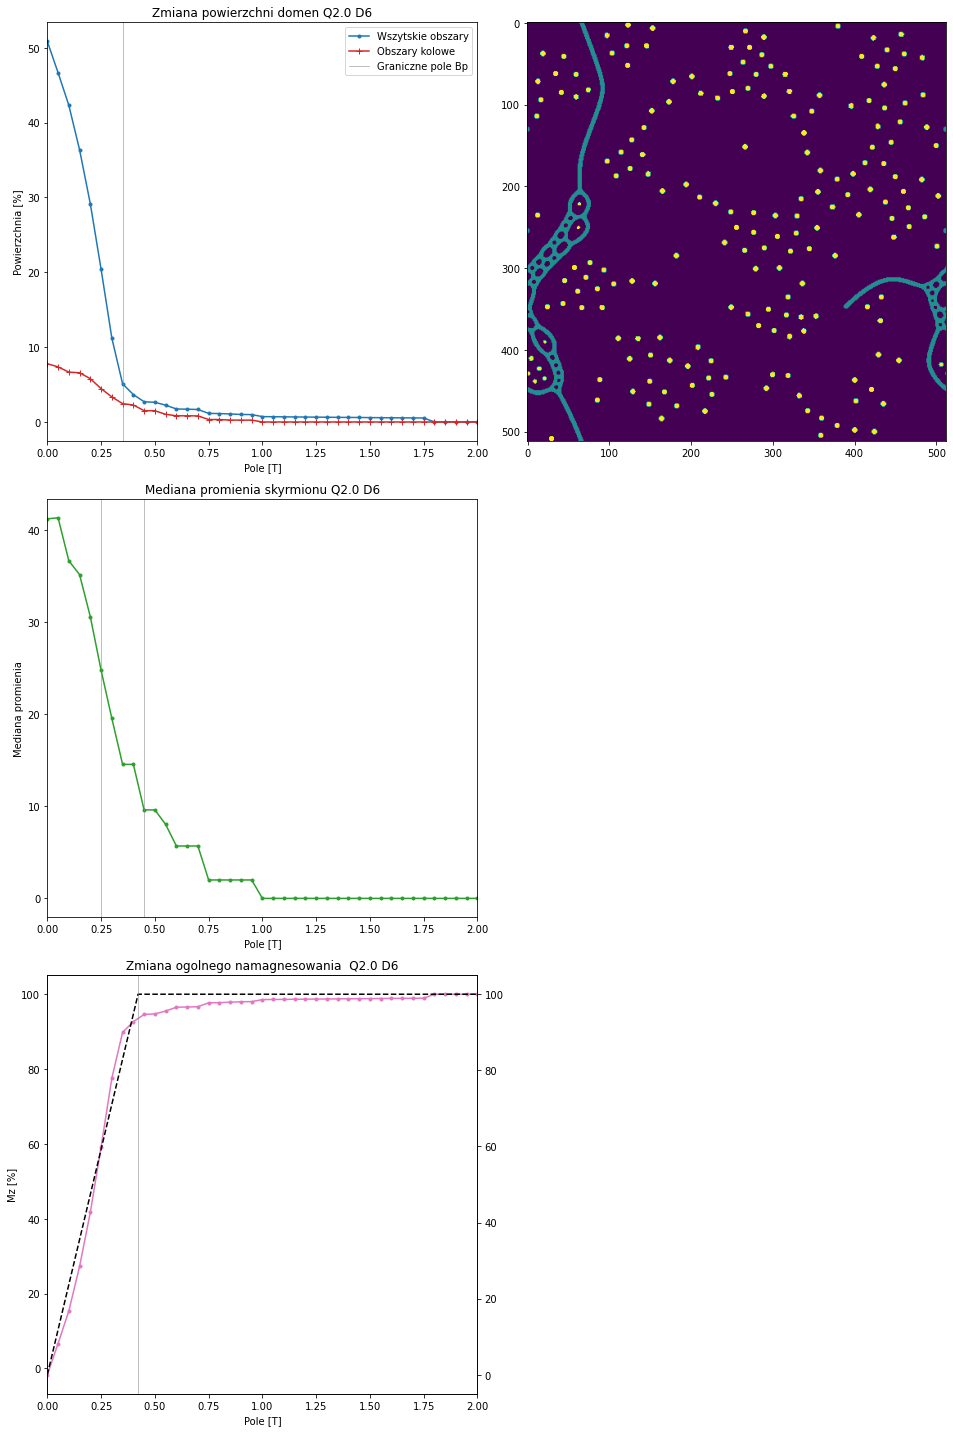

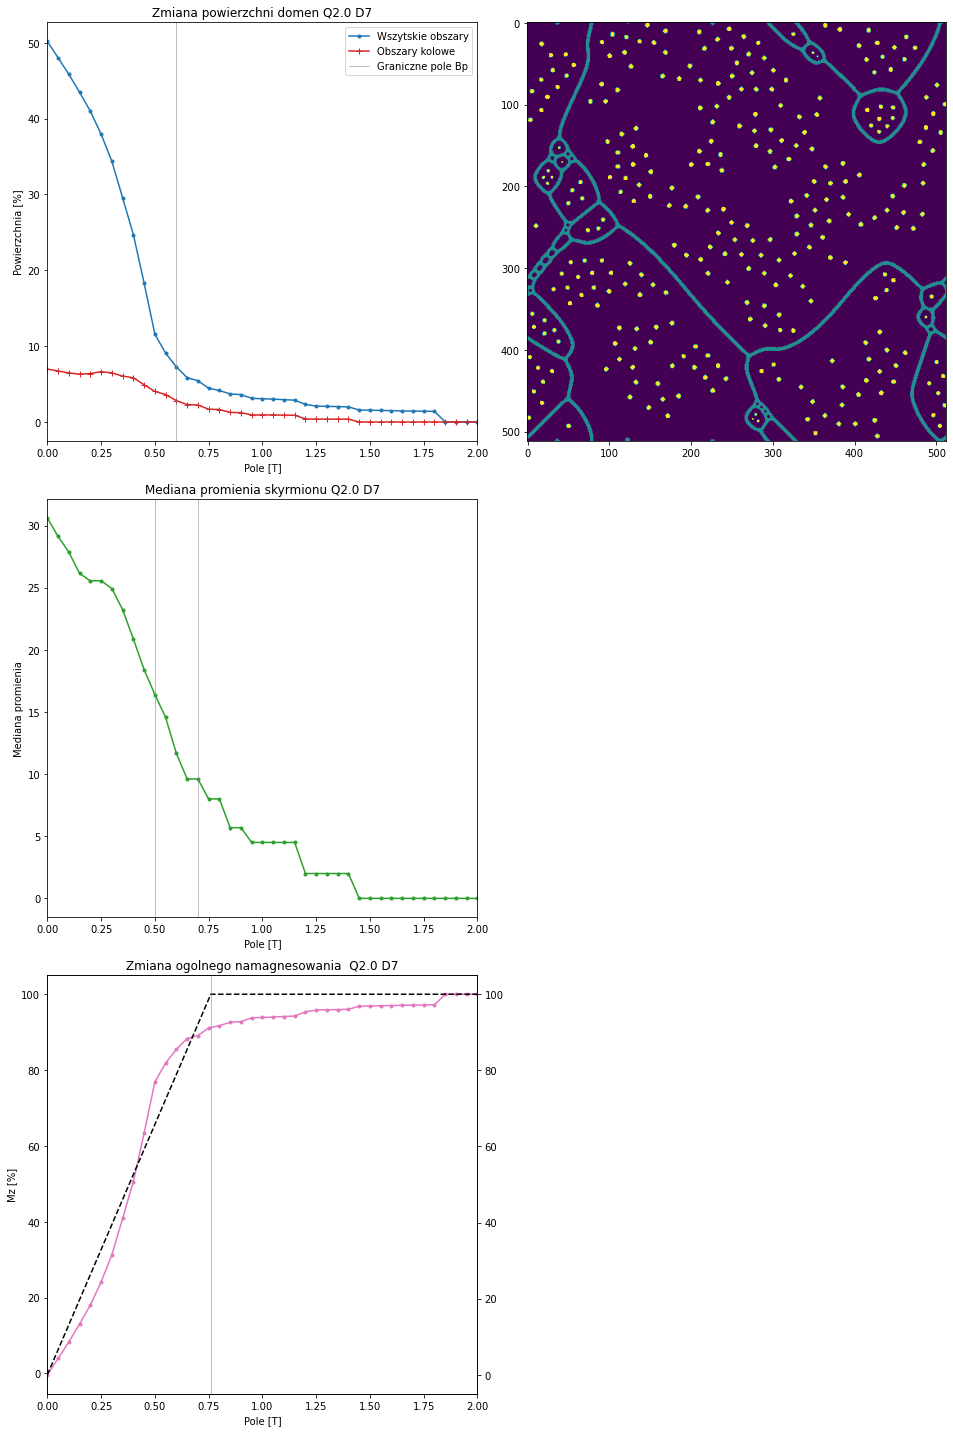

In [6]:
for litx in range(11):                     #  <------- Okreslenie petli na plikach wejsciowych 
    for lity in range(9):
        tabT=np.zeros((8,41))
        for litz in range(41):
            litxx=format(litx*0.2,".1f")            
            litzz=format(litz*0.05,".2f")
            filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
            filename=str(filename)

            logic=os.path.isfile(filename)

            if logic:

                im=np.load(filename)
                h,w = im.shape
                k=len(np.zeros(int(np.max(im)+1),dtype=int))
                if k>0:
                    vtab=np.zeros(int(np.max(im)+1),dtype=int)
                    xtab=np.zeros(int(np.max(im)+1),dtype=float)
                    ytab=np.zeros(int(np.max(im)+1),dtype=float)
                    r2tab=np.ones(int(np.max(im)+1),dtype=float)

                for y in range(h):
                    for x in range(w):
                        t=int(im[y,x])
                        if t>=0:
                            vtab[t]+=1
                            xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                            ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                            r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                            if r2>r2tab[t]:
                                r2tab[t]=r2


                if len(vtab)>0:  
                    minw=np.min(vtab)
                    maxw=np.max(vtab)
                    swaz=np.average(vtab)
                else:
                    minw=0
                    maxw=0
                    swaz=0


                kolo=vtab/r2tab>1.8 
                rskyr=np.zeros(np.shape(r2tab))
                for i in range(len(r2tab)):
                    if kolo[i]==True:
                        rskyr[i]=r2tab[i]

                mediana=rskyr[rskyr !=0]

                kolmap=np.zeros(np.shape(im))
                mzmap=np.zeros(np.shape(im))
                for x in range(h):
                    for y in range(w):
                        t=int(im[x,y])
                        p=int(im[x,y])
                        if t>=0:
                            kolmap[y,x]=kolo[t]
                        if p>=0:
                            mzmap[x,y]=True


                tabT[0,litz]=litzz                                                         # pole B
                tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100                # powierzchnia domen w %
                tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1))                        # powierzchnia domen
                tabT[4,litz]=((np.count_nonzero(kolmap==True)/np.size(im)))*100            # powierzchnai domen kolowych w %
                if np.median(mediana) >=0:
                    tabT[6,litz]=np.median(mediana)                                              # mediana promeinia
                else:
                    tabT[6,litz]=0
                tabT[7,litz]=(np.count_nonzero(mzmap==False)/np.size(im)-np.count_nonzero(mzmap==True)/np.size(im))*100                 # Mz


        if os.path.isfile(filename):
            for i in range(len(tabT[0])):
                if tabT[1,i]-tabT[4,i]<=5:    #0.5:
        #         if tabT[1,i]>0 and tabT[4,i]/tabT[1,i]>0.5:
                    xodn1=tabT[0,i]
                    break;

            xtab=tabT[0,:]
            ytab=tabT[7,:]  

            def fcja(x,x0):
                if x<x0:
                    return 100*x/x0
                else:
                    return 100

            def fcja2(xx,x0):
                return [fcja(x,x0) for x in xx]

            popt, pcov = curve_fit(fcja2, xtab,ytab)
            x0=popt[0] 




            x_x=format(xodn1*1,".2f")
            filenameims=f"Q{litxx}0_D0{lity}mJ_B_ext{x_x}T.ovf.npy" 
            filenameims=str(filenameims)
            if os.path.isfile(filename):
                ims=np.load(filenameims)
                hims, wims=im.shape
                ks=len(np.zeros(int(np.max(ims)+1),dtype=int))
                if ks>0:
                    vtabs=np.zeros(int(np.max(ims)+1),dtype=int)
                    xtabs=np.zeros(int(np.max(ims)+1),dtype=float)
                    ytabs=np.zeros(int(np.max(ims)+1),dtype=float)
                    r2tabs=np.ones(int(np.max(ims)+1),dtype=float)

                for y in range(hims):
                    for x in range(wims):
                        ts=int(ims[y,x])
                        if ts>=0:
                            vtabs[ts]+=1
                            xtabs[ts]=(x+xtabs[ts]*(vtabs[ts]-1))/vtabs[ts]
                            ytabs[ts]=(y+ytabs[ts]*(vtabs[ts]-1))/vtabs[ts]
                            r2s=(x-xtabs[ts]+0.5)**2+(y-ytabs[ts]+0.5)**2
                            if r2s>r2tabs[ts]:
                                r2tabs[ts]=r2s

                kolos=vtabs/r2tabs>1.8 

                for a in range(hims):
                    for b in range(wims):
                        if int(ims[a,b])>=0:
                            check=int(ims[a,b])
                            if kolos[check]==True:
                                ims[a,b]=2
                            else: 
                                ims[a,b]=1
                        else:
                            ims[a,b]=0

            color0='tab:red'
            color1='tab:blue'
            color2='tab:green'
            color3='tab:pink'


            plt.figure(figsize=(20,20))
            plot1 = plt.subplot2grid((3,3), (0, 0))
            plot2 = plt.subplot2grid((3,3), (0, 1))
            plot3 = plt.subplot2grid((3,3), (1, 0))
            plot4 = plt.subplot2grid((3,3), (2, 0))
            plot41 = plot4.twinx()
            plot4.plot(tabT[0,:],tabT[7,:],'.-', color=color3)
            plot4.set_title(f"Zmiana ogolnego namagnesowania  Q{litxx} D{lity}")
            plot4.set_xlabel('Pole [T]')
            plot4.set_ylabel('Mz [%]')
            plot4.set_xlim([0,2])
            plot41.plot([0,x0,2],[0, 100,100],'k--')
            plot41.axvline(x0, color='tab:gray', linewidth=0.5)
            plot3.set_xlabel('Pole [T]')
            plot3.set_ylabel('Mediana promienia [nm]')
            plot3.set_title(f"Mediana promienia skyrmionu Q{litxx} D{lity}")
            plot3.plot(tabT[0,:],tabT[6,:]*2,'.-' , color=color2)
            plot3.set_xlim([0,2])
            plot3.axvline(x=xodn1+0.1, color='tab:gray', linewidth=0.5)
            plot3.axvline(x=xodn1-0.1, color='tab:gray', linewidth=0.5)
            plot2.imshow(ims)
            plot1.plot(tabT[0,:],tabT[1,:],'.-', color=color1)  
            plot1.plot(tabT[0,:],tabT[4,:],'+-', color=color0)
            plot1.axvline(xodn1, color='tab:gray', linewidth=0.5)
            plot1.legend(["Wszytskie obszary", "Obszary kolowe", "Graniczne pole Bp"])
            plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
            plot1.set_xlabel('Pole [T]')
            plot1.set_ylabel('Powierzchnia [%]')
            plot1.set_xlim([0,2])
            plt.tight_layout()

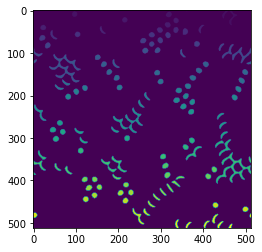

In [7]:


filename=f"Q0.40_D04mJ_B_ext0.30T.ovf.npy" 
filename=str(filename)

logic=os.path.isfile(filename)


im=np.load(filename)
    
plt.imshow(im)

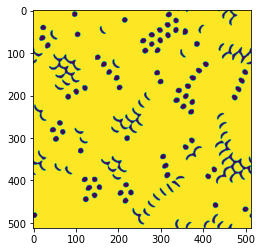

In [10]:
def readOVF(plik):
    f=open(plik,"rb")
    byte=f.read()
    ii=0
    t4=b''
    t8=b''
    while (t8!=b'@\xdew\x83!\x12\xdcB') & (t4!=b'8\xb4\x96I'):
        t8=byte[ii:(ii+8)]
        t4=byte[ii:(ii+4)]
        ii=ii+1
    words=byte[0:ii].decode().replace('\n',' ').split(' ')
    xns="xnodes:"
    yns="ynodes:"
    zns="znodes:"
    bins="Binary"
    xnn=[s+1 for s,v in enumerate(words) if v==xns]
    ynn=[s+1 for s,v in enumerate(words) if v==yns]
    znn=[s+1 for s,v in enumerate(words) if v==zns]
    binn=[s+1 for s,v in enumerate(words) if v==bins]
    xn=int(words[xnn[0]])
    yn=int(words[ynn[0]])
    zn=int(words[znn[0]])
    bn=int(words[binn[0]])
    if bn==4:
        dat=struct.unpack('f'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])
    if bn==8:
        dat=struct.unpack('d'*xn*yn*zn*3,byte[(ii+bn-1):(ii+bn-1+xn*yn*zn*bn*3)])   
    dat3=np.array(dat).reshape(zn,yn,xn,3)
    ms=np.sqrt(pow(dat3[0,0,0,0],2)+pow(dat3[0,0,0,1],2)+pow(dat3[0,0,0,2],2))
    return dat3/ms

filename="Q0.40_D04mJ_B_ext0.30T.ovf"  
filename=str(filename)

logic=os.path.isfile(filename)


if logic:
    tab=readOVF(filename) 
    tab2=np.round((tab[0,:,:,2]/2+1/2))
    im = tab2[:]-2
    h,w = im.shape
    mask = np.zeros((h+2,w+2),np.uint8)

              
plt.imshow(im)

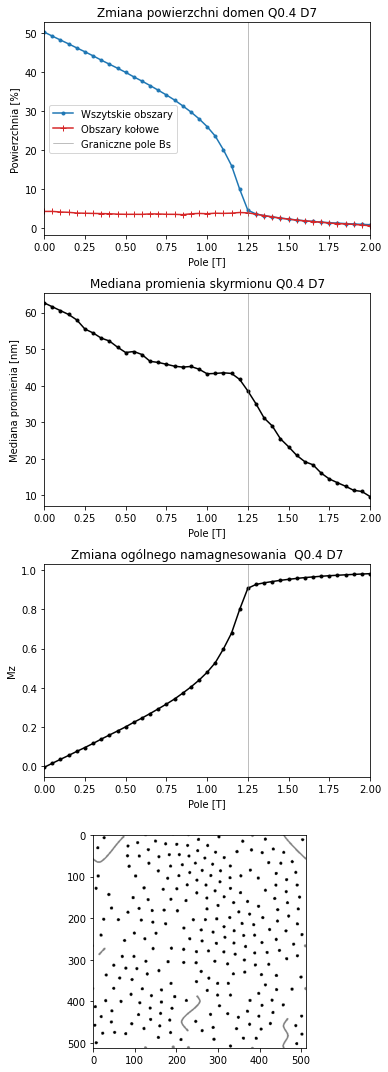

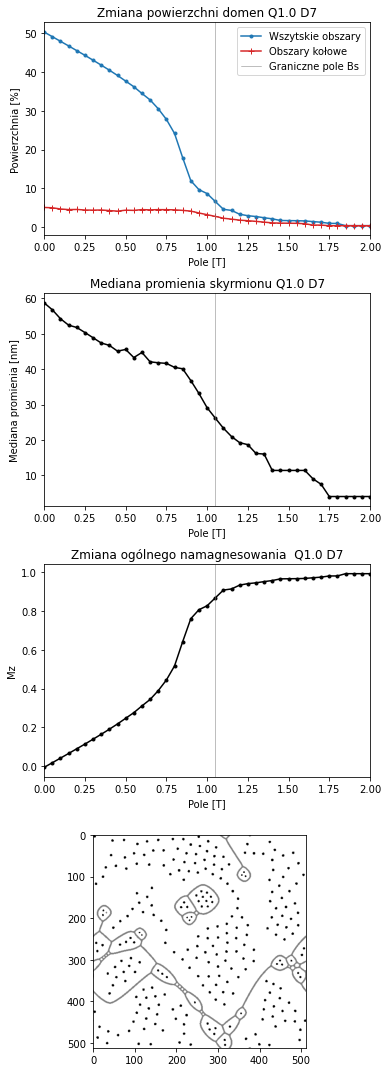

/home/student/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/student/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


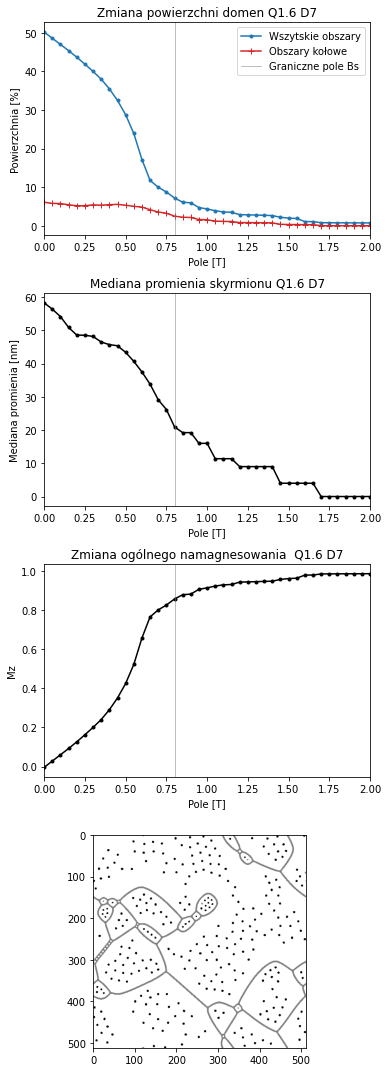

In [38]:
qtab=[ 2, 5, 8]
dtab=[ 7, 7, 7]
for i in range(len(qtab)):   
    litx=qtab[i]              
    lity=dtab[i]
    tabT=np.zeros((8,41))
    for litz in range(41):
        litxx=format(litx*0.2,".1f")            
        litzz=format(litz*0.05,".2f")
        filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
        filename=str(filename)

        logic=os.path.isfile(filename)

        if logic:

            im=np.load(filename)
            h,w = im.shape
            k=len(np.zeros(int(np.max(im)+1),dtype=int))
            if k>0:
                vtab=np.zeros(int(np.max(im)+1),dtype=int)
                xtab=np.zeros(int(np.max(im)+1),dtype=float)
                ytab=np.zeros(int(np.max(im)+1),dtype=float)
                r2tab=np.ones(int(np.max(im)+1),dtype=float)

            for y in range(h):
                for x in range(w):
                    t=int(im[y,x])
                    if t>=0:
                        vtab[t]+=1
                        xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                        ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                        r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                        if r2>r2tab[t]:
                            r2tab[t]=r2


            if len(vtab)>0:  
                minw=np.min(vtab)
                maxw=np.max(vtab)
                swaz=np.average(vtab)
            else:
                minw=0
                maxw=0
                swaz=0


            kolo=vtab/r2tab>1.8 
            rskyr=np.zeros(np.shape(r2tab))
            for i in range(len(r2tab)):
                if kolo[i]==True:
                    rskyr[i]=r2tab[i]

            mediana=rskyr[rskyr !=0]

            kolmap=np.zeros(np.shape(im))
            mzmap=np.zeros(np.shape(im))
            for x in range(h):
                for y in range(w):
                    t=int(im[x,y])
                    p=int(im[x,y])
                    if t>=0:
                        kolmap[y,x]=kolo[t]
                    if p>=0:
                        mzmap[x,y]=True


            tabT[0,litz]=litzz                                                         # pole B
            tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100                # powierzchnia domen w %
            tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1))                        # powierzchnia domen
            tabT[4,litz]=((np.count_nonzero(kolmap==True)/np.size(im)))*100            # powierzchnai domen kolowych w %
            if np.median(mediana) >=0:
                tabT[6,litz]=np.median(mediana)                                              # mediana promeinia
            else:
                tabT[6,litz]=0
            tabT[7,litz]=(np.count_nonzero(mzmap==False)/np.size(im)-np.count_nonzero(mzmap==True)/np.size(im))*100                 # Mz


    if os.path.isfile(filename):
        for i in range(len(tabT[0])):
            if tabT[1,i]-tabT[4,i]<=5:    #0.5:
    #         if tabT[1,i]>0 and tabT[4,i]/tabT[1,i]>0.5:
                xodn1=tabT[0,i]
                break;


        x_x=format(xodn1*1,".2f")
        filenameims=f"Q{litxx}0_D0{lity}mJ_B_ext{x_x}T.ovf.npy" 
        filenameims=str(filenameims)
        if os.path.isfile(filename):
            ims=np.load(filenameims)
            hims, wims=im.shape
            ks=len(np.zeros(int(np.max(ims)+1),dtype=int))
            if ks>0:
                vtabs=np.zeros(int(np.max(ims)+1),dtype=int)
                xtabs=np.zeros(int(np.max(ims)+1),dtype=float)
                ytabs=np.zeros(int(np.max(ims)+1),dtype=float)
                r2tabs=np.ones(int(np.max(ims)+1),dtype=float)

            for y in range(hims):
                for x in range(wims):
                    ts=int(ims[y,x])
                    if ts>=0:
                        vtabs[ts]+=1
                        xtabs[ts]=(x+xtabs[ts]*(vtabs[ts]-1))/vtabs[ts]
                        ytabs[ts]=(y+ytabs[ts]*(vtabs[ts]-1))/vtabs[ts]
                        r2s=(x-xtabs[ts]+0.5)**2+(y-ytabs[ts]+0.5)**2
                        if r2s>r2tabs[ts]:
                            r2tabs[ts]=r2s

            kolos=vtabs/r2tabs>1.8 

            for a in range(hims):
                for b in range(wims):
                    if int(ims[a,b])>=0:
                        check=int(ims[a,b])
                        if kolos[check]==True:
                            ims[a,b]=2
                        else: 
                            ims[a,b]=1
                    else:
                        ims[a,b]=0

        color0='tab:red'
        color1='tab:blue'
        color2='tab:green'
        color3='tab:pink'
        
        fig = plt.figure(figsize=(15,15))
        plot1 = plt.subplot2grid((4,6), (0, 0), colspan=2)
        plot2 = plt.subplot2grid((4,3), (3, 0))
        plot3 = plt.subplot2grid((4,6), (1, 0), colspan=2)
        plot4 = plt.subplot2grid((4,6), (2, 0), colspan=2)
        plot4.plot(tabT[0,:],tabT[7,:]/100,'.-', color="black")
        plot4.set_title(f"Zmiana ogólnego namagnesowania  Q{litxx} D{lity}")
        plot4.set_xlabel('Pole [T]')
        plot4.set_ylabel('Mz')
        plot4.set_xlim([0,2])
        plot4.axvline(xodn1, color='tab:gray', linewidth=0.5)
        plot3.set_xlabel('Pole [T]')
        plot3.set_ylabel('Mediana promienia [nm]')
        plot3.set_title(f"Mediana promienia skyrmionu Q{litxx} D{lity}")
        plot3.plot(tabT[0,:],tabT[6,:]*2,'.-' , color='black')
        plot3.set_xlim([0,2])
        plot3.axvline(xodn1, color='tab:gray', linewidth=0.5)
        plot2.imshow(ims, cmap='binary')
        plot1.plot(tabT[0,:],tabT[1,:],'.-', color=color1)  
        plot1.plot(tabT[0,:],tabT[4,:],'+-', color=color0)
        plot1.axvline(xodn1, color='tab:gray', linewidth=0.5)
        plot1.legend(["Wszytskie obszary", "Obszary kołowe", "Graniczne pole Bs"])
        plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
        plot1.set_xlabel('Pole [T]')
        plot1.set_ylabel('Powierzchnia [%]')
        plot1.set_xlim([0,2])
        plt.tight_layout()
        plt.show()
        fig.savefig(f"wykresy{litxx}.png", dpi=300, transparent=False)



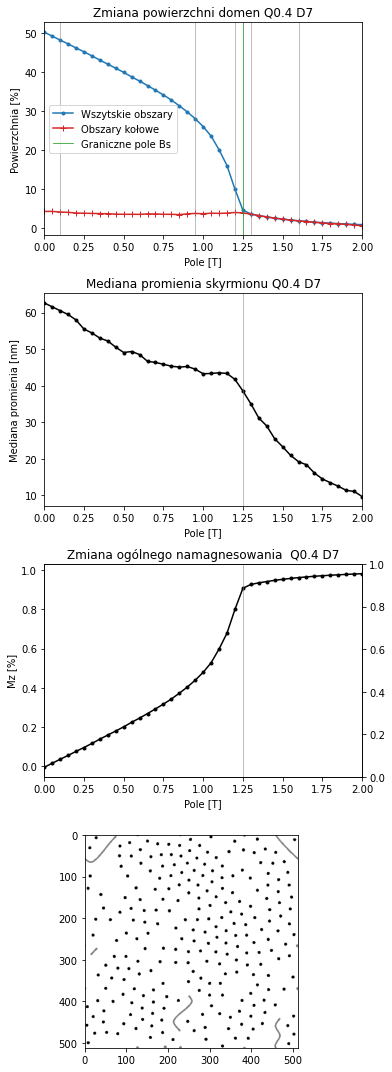

In [40]:
qtab=[ 2]
dtab=[ 7]
for i in range(len(qtab)):   
    litx=qtab[i]              
    lity=dtab[i]
    tabT=np.zeros((8,41))
    for litz in range(41):
        litxx=format(litx*0.2,".1f")            
        litzz=format(litz*0.05,".2f")
        filename=f"Q{litxx}0_D0{lity}mJ_B_ext{litzz}T.ovf.npy" 
        filename=str(filename)

        logic=os.path.isfile(filename)

        if logic:

            im=np.load(filename)
            h,w = im.shape
            k=len(np.zeros(int(np.max(im)+1),dtype=int))
            if k>0:
                vtab=np.zeros(int(np.max(im)+1),dtype=int)
                xtab=np.zeros(int(np.max(im)+1),dtype=float)
                ytab=np.zeros(int(np.max(im)+1),dtype=float)
                r2tab=np.ones(int(np.max(im)+1),dtype=float)

            for y in range(h):
                for x in range(w):
                    t=int(im[y,x])
                    if t>=0:
                        vtab[t]+=1
                        xtab[t]=(x+xtab[t]*(vtab[t]-1))/vtab[t]
                        ytab[t]=(y+ytab[t]*(vtab[t]-1))/vtab[t]
                        r2=(x-xtab[t]+0.5)**2+(y-ytab[t]+0.5)**2
                        if r2>r2tab[t]:
                            r2tab[t]=r2


            if len(vtab)>0:  
                minw=np.min(vtab)
                maxw=np.max(vtab)
                swaz=np.average(vtab)
            else:
                minw=0
                maxw=0
                swaz=0


            kolo=vtab/r2tab>1.8 
            rskyr=np.zeros(np.shape(r2tab))
            for i in range(len(r2tab)):
                if kolo[i]==True:
                    rskyr[i]=r2tab[i]

            mediana=rskyr[rskyr !=0]

            kolmap=np.zeros(np.shape(im))
            mzmap=np.zeros(np.shape(im))
            for x in range(h):
                for y in range(w):
                    t=int(im[x,y])
                    p=int(im[x,y])
                    if t>=0:
                        kolmap[y,x]=kolo[t]
                    if p>=0:
                        mzmap[x,y]=True


            tabT[0,litz]=litzz                                                         # pole B
            tabT[1,litz]=(1-(np.count_nonzero(im==-1)/np.size(im)))*100                # powierzchnia domen w %
            tabT[2,litz]=np.size(im)-(np.count_nonzero(im==-1))                        # powierzchnia domen
            tabT[4,litz]=((np.count_nonzero(kolmap==True)/np.size(im)))*100            # powierzchnai domen kolowych w %
            if np.median(mediana) >=0:
                tabT[6,litz]=np.median(mediana)                                              # mediana promeinia
            else:
                tabT[6,litz]=0
            tabT[7,litz]=(np.count_nonzero(mzmap==False)/np.size(im)-np.count_nonzero(mzmap==True)/np.size(im))*100                 # Mz


    if os.path.isfile(filename):
        for i in range(len(tabT[0])):
            if tabT[1,i]-tabT[4,i]<=5:    #0.5:
    #         if tabT[1,i]>0 and tabT[4,i]/tabT[1,i]>0.5:
                xodn1=tabT[0,i]
                break;


        x_x=format(xodn1*1,".2f")
        filenameims=f"Q{litxx}0_D0{lity}mJ_B_ext{x_x}T.ovf.npy" 
        filenameims=str(filenameims)
        if os.path.isfile(filename):
            ims=np.load(filenameims)
            hims, wims=im.shape
            ks=len(np.zeros(int(np.max(ims)+1),dtype=int))
            if ks>0:
                vtabs=np.zeros(int(np.max(ims)+1),dtype=int)
                xtabs=np.zeros(int(np.max(ims)+1),dtype=float)
                ytabs=np.zeros(int(np.max(ims)+1),dtype=float)
                r2tabs=np.ones(int(np.max(ims)+1),dtype=float)

            for y in range(hims):
                for x in range(wims):
                    ts=int(ims[y,x])
                    if ts>=0:
                        vtabs[ts]+=1
                        xtabs[ts]=(x+xtabs[ts]*(vtabs[ts]-1))/vtabs[ts]
                        ytabs[ts]=(y+ytabs[ts]*(vtabs[ts]-1))/vtabs[ts]
                        r2s=(x-xtabs[ts]+0.5)**2+(y-ytabs[ts]+0.5)**2
                        if r2s>r2tabs[ts]:
                            r2tabs[ts]=r2s

            kolos=vtabs/r2tabs>1.8 

            for a in range(hims):
                for b in range(wims):
                    if int(ims[a,b])>=0:
                        check=int(ims[a,b])
                        if kolos[check]==True:
                            ims[a,b]=2
                        else: 
                            ims[a,b]=1
                    else:
                        ims[a,b]=0

        color0='tab:red'
        color1='tab:blue'
        color2='tab:green'
        color3='tab:pink'
        
        
        fig = plt.figure(figsize=(15,15))
        plot1 = plt.subplot2grid((4,6), (0, 0), colspan=2)
        plot2 = plt.subplot2grid((4,3), (3, 0))
        plot3 = plt.subplot2grid((4,6), (1, 0), colspan=2)
        plot4 = plt.subplot2grid((4,6), (2, 0), colspan=2)
        plot41 = plot4.twinx()
        plot4.plot(tabT[0,:],tabT[7,:]/100,'.-', color="black")
        plot4.set_title(f"Zmiana ogólnego namagnesowania  Q{litxx} D{lity}")
        plot4.set_xlabel('Pole [T]')
        plot4.set_ylabel('Mz [%]')
        plot4.set_xlim([0,2])
        plot41.axvline(xodn1, color='tab:gray', linewidth=0.5)
        plot3.set_xlabel('Pole [T]')
        plot3.set_ylabel('Mediana promienia [nm]')
        plot3.set_title(f"Mediana promienia skyrmionu Q{litxx} D{lity}")
        plot3.plot(tabT[0,:],tabT[6,:]*2,'.-' , color='black')
        plot3.set_xlim([0,2])
        plot3.axvline(xodn1, color='tab:gray', linewidth=0.5)
        plot2.imshow(ims, cmap='binary')
        plot1.plot(tabT[0,:],tabT[1,:],'.-', color=color1)  
        plot1.plot(tabT[0,:],tabT[4,:],'+-', color=color0)
        plot1.axvline(xodn1, color='tab:green', linewidth=0.8)
        plot1.axvline(0.10, color='tab:gray', linewidth=0.5)
        plot1.axvline(0.95, color='tab:gray', linewidth=0.5)
        plot1.axvline(1.20, color='tab:gray', linewidth=0.5)
        plot1.axvline(1.30, color='tab:gray', linewidth=0.5)
        plot1.axvline(1.60, color='tab:gray', linewidth=0.5)
        plot1.legend(["Wszytskie obszary", "Obszary kołowe", "Graniczne pole Bs"])
        plot1.set_title(f"Zmiana powierzchni domen Q{litxx} D{lity}")
        plot1.set_xlabel('Pole [T]')
        plot1.set_ylabel('Powierzchnia [%]')
        plot1.set_xlim([0,2])
        plt.tight_layout()
        plt.show()

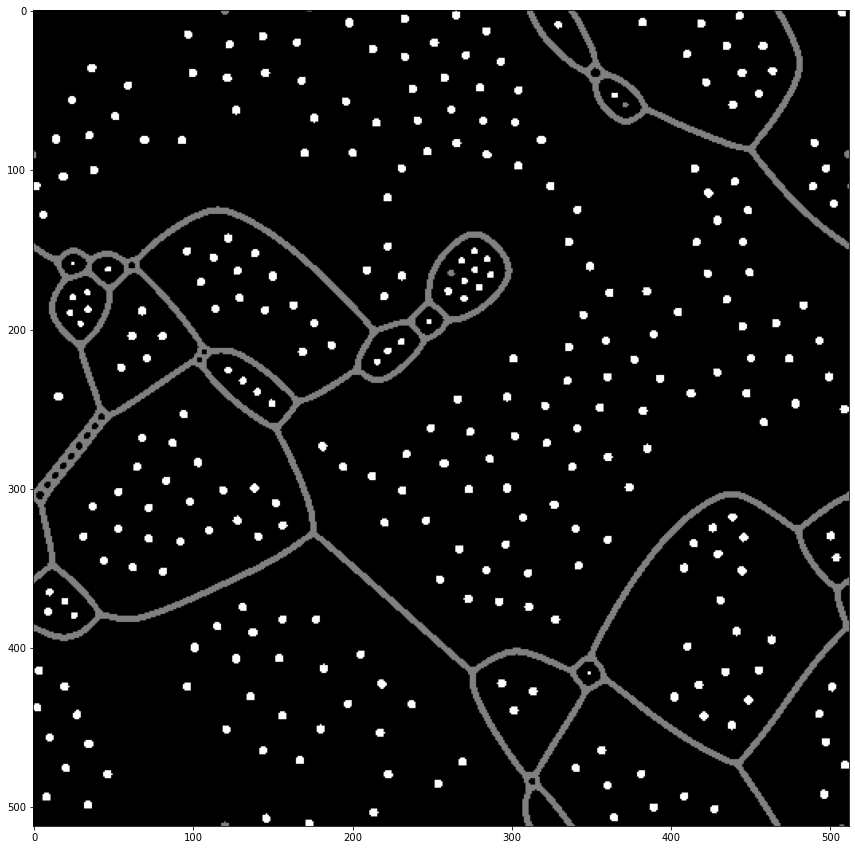

In [32]:
plt.figure(figsize=(15,15))
plt.imshow(ims, cmap='gray')